In [23]:
import keras
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline

In [7]:
seed=7
np.random.seed(seed)
dataframe=pd.read_csv("iris.csv",header=None)
dataset=dataframe.values
X=dataset[:,0:4].astype(float)
Y=dataset[:,4]

In [12]:
dataframe

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [13]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
Y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [14]:
encoder=LabelEncoder()
encoder.fit(Y)
encoded_y=encoder.transform(Y)
encoded_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [15]:
dummy_y=np_utils.to_categorical(encoded_y)

In [16]:
dummy_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [17]:
from keras import models

def Create_Baseline():
    #preparing layers
    model=models.Sequential()
    model.add(Dense(8,activation='relu',input_shape=(4,)))
    model.add(Dense(3,activation='softmax'))
    #Compiling
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])
    return model

In [40]:
estimator=KerasClassifier(build_fn=Create_Baseline,epochs=200,batch_size=5,verbose=1)

In [41]:
kfold=KFold(n_splits=10,shuffle=True,random_state=seed)

In [42]:
results=cross_val_score(estimator,X,dummy_y,cv=kfold)
print("Baseline:%.2f%%(%.2f%%)"%(results.mean()*100,results.std()*100))

Epoch 1/200
135/135 [==============================] - 4s 26ms/step - loss: 3.5213 - acc: 0.2963
Epoch 2/200
135/135 [==============================] - 0s 563us/step - loss: 2.8364 - acc: 0.0074
Epoch 3/200
135/135 [==============================] - 0s 593us/step - loss: 2.3700 - acc: 0.0000e+00
Epoch 4/200
135/135 [==============================] - 0s 615us/step - loss: 2.0609 - acc: 0.0000e+00
Epoch 5/200
135/135 [==============================] - 0s 585us/step - loss: 1.8164 - acc: 0.0815
Epoch 6/200
135/135 [==============================] - 0s 615us/step - loss: 1.5958 - acc: 0.1259
Epoch 7/200
135/135 [==============================] - 0s 615us/step - loss: 1.4102 - acc: 0.2370
Epoch 8/200
135/135 [==============================] - 0s 681us/step - loss: 1.2687 - acc: 0.3333
Epoch 9/200
135/135 [==============================] - 0s 644us/step - loss: 1.1750 - acc: 0.3481
Epoch 10/200
135/135 [==============================] - 0s 652us/step - loss: 1.1057 - acc: 0.3556
Epoch 11/200

135/135 [==============================] - 0s 659us/step - loss: 0.1529 - acc: 0.9704
Epoch 166/200
135/135 [==============================] - 0s 667us/step - loss: 0.1527 - acc: 0.9704
Epoch 167/200
135/135 [==============================] - 0s 607us/step - loss: 0.1532 - acc: 0.9704
Epoch 168/200
135/135 [==============================] - 0s 563us/step - loss: 0.1502 - acc: 0.9704
Epoch 169/200
135/135 [==============================] - 0s 556us/step - loss: 0.1524 - acc: 0.9630
Epoch 170/200
135/135 [==============================] - 0s 622us/step - loss: 0.1467 - acc: 0.9704
Epoch 171/200
135/135 [==============================] - 0s 600us/step - loss: 0.1469 - acc: 0.9704
Epoch 172/200
135/135 [==============================] - 0s 541us/step - loss: 0.1457 - acc: 0.9778
Epoch 173/200
135/135 [==============================] - 0s 607us/step - loss: 0.1451 - acc: 0.9704
Epoch 174/200
135/135 [==============================] - 0s 578us/step - loss: 0.1443 - acc: 0.9704
Epoch 175/200


Epoch 128/200
135/135 [==============================] - 0s 526us/step - loss: 0.0903 - acc: 0.9778
Epoch 129/200
135/135 [==============================] - 0s 511us/step - loss: 0.0905 - acc: 0.9704
Epoch 130/200
135/135 [==============================] - 0s 526us/step - loss: 0.0889 - acc: 0.9778
Epoch 131/200
135/135 [==============================] - 0s 526us/step - loss: 0.0876 - acc: 0.9778
Epoch 132/200
135/135 [==============================] - 0s 526us/step - loss: 0.0896 - acc: 0.9704
Epoch 133/200
135/135 [==============================] - 0s 518us/step - loss: 0.0887 - acc: 0.9778
Epoch 134/200
135/135 [==============================] - 0s 541us/step - loss: 0.0893 - acc: 0.9704
Epoch 135/200
135/135 [==============================] - 0s 548us/step - loss: 0.0878 - acc: 0.9778
Epoch 136/200
135/135 [==============================] - 0s 570us/step - loss: 0.0859 - acc: 0.9778
Epoch 137/200
135/135 [==============================] - 0s 541us/step - loss: 0.0843 - acc: 0.9778


135/135 [==============================] - 0s 548us/step - loss: 0.3319 - acc: 0.9556
Epoch 92/200
135/135 [==============================] - 0s 556us/step - loss: 0.3283 - acc: 0.9556
Epoch 93/200
135/135 [==============================] - 0s 526us/step - loss: 0.3236 - acc: 0.9556
Epoch 94/200
135/135 [==============================] - 0s 556us/step - loss: 0.3196 - acc: 0.9407
Epoch 95/200
135/135 [==============================] - 0s 518us/step - loss: 0.3171 - acc: 0.9407
Epoch 96/200
135/135 [==============================] - 0s 556us/step - loss: 0.3130 - acc: 0.9481
Epoch 97/200
135/135 [==============================] - 0s 519us/step - loss: 0.3077 - acc: 0.9481
Epoch 98/200
135/135 [==============================] - 0s 548us/step - loss: 0.3043 - acc: 0.9481
Epoch 99/200
135/135 [==============================] - 0s 533us/step - loss: 0.2994 - acc: 0.9556
Epoch 100/200
135/135 [==============================] - 0s 518us/step - loss: 0.2960 - acc: 0.9556
Epoch 101/200
135/135 

135/135 [==============================] - 0s 670us/step - loss: 0.3404 - acc: 0.9556
Epoch 54/200
135/135 [==============================] - 0s 559us/step - loss: 0.3365 - acc: 0.9778
Epoch 55/200
135/135 [==============================] - 0s 659us/step - loss: 0.3344 - acc: 0.9481
Epoch 56/200
135/135 [==============================] - 0s 644us/step - loss: 0.3232 - acc: 0.9704
Epoch 57/200
135/135 [==============================] - 0s 541us/step - loss: 0.3191 - acc: 0.9704
Epoch 58/200
135/135 [==============================] - 0s 660us/step - loss: 0.3118 - acc: 0.9704
Epoch 59/200
135/135 [==============================] - 0s 644us/step - loss: 0.3098 - acc: 0.9704
Epoch 60/200
135/135 [==============================] - 0s 563us/step - loss: 0.3059 - acc: 0.9704
Epoch 61/200
135/135 [==============================] - 0s 656us/step - loss: 0.2996 - acc: 0.9704
Epoch 62/200
135/135 [==============================] - 0s 622us/step - loss: 0.2952 - acc: 0.9704
Epoch 63/200
135/135 [=

135/135 [==============================] - 0s 563us/step - loss: 0.6891 - acc: 0.5556
Epoch 17/200
135/135 [==============================] - 0s 593us/step - loss: 0.6623 - acc: 0.5630
Epoch 18/200
135/135 [==============================] - 0s 604us/step - loss: 0.6439 - acc: 0.5704
Epoch 19/200
135/135 [==============================] - 0s 545us/step - loss: 0.6312 - acc: 0.5704
Epoch 20/200
135/135 [==============================] - 0s 578us/step - loss: 0.6205 - acc: 0.6222
Epoch 21/200
135/135 [==============================] - 0s 585us/step - loss: 0.5920 - acc: 0.6963
Epoch 22/200
135/135 [==============================] - 0s 604us/step - loss: 0.5767 - acc: 0.7259
Epoch 23/200
135/135 [==============================] - 0s 722us/step - loss: 0.5628 - acc: 0.8000
Epoch 24/200
135/135 [==============================] - 0s 626us/step - loss: 0.5472 - acc: 0.7926
Epoch 25/200
135/135 [==============================] - 0s 578us/step - loss: 0.5329 - acc: 0.8593
Epoch 26/200
135/135 [=

135/135 [==============================] - 0s 596us/step - loss: 0.1009 - acc: 0.9778
Epoch 181/200
135/135 [==============================] - 0s 552us/step - loss: 0.0984 - acc: 0.9778
Epoch 182/200
135/135 [==============================] - 0s 567us/step - loss: 0.1009 - acc: 0.9778
Epoch 183/200
135/135 [==============================] - 0s 678us/step - loss: 0.1034 - acc: 0.9704
Epoch 184/200
135/135 [==============================] - 0s 700us/step - loss: 0.0971 - acc: 0.9778
Epoch 185/200
135/135 [==============================] - 0s 563us/step - loss: 0.0995 - acc: 0.9778
Epoch 186/200
135/135 [==============================] - 0s 596us/step - loss: 0.0977 - acc: 0.9778
Epoch 187/200
135/135 [==============================] - 0s 578us/step - loss: 0.0961 - acc: 0.9778
Epoch 188/200
135/135 [==============================] - 0s 581us/step - loss: 0.0965 - acc: 0.9778
Epoch 189/200
135/135 [==============================] - 0s 556us/step - loss: 0.0971 - acc: 0.9778
Epoch 190/200


135/135 [==============================] - 0s 622us/step - loss: 0.1220 - acc: 0.9704
Epoch 145/200
135/135 [==============================] - 0s 578us/step - loss: 0.1228 - acc: 0.9630
Epoch 146/200
135/135 [==============================] - 0s 607us/step - loss: 0.1190 - acc: 0.9704
Epoch 147/200
135/135 [==============================] - 0s 593us/step - loss: 0.1189 - acc: 0.9704
Epoch 148/200
135/135 [==============================] - 0s 611us/step - loss: 0.1193 - acc: 0.9704
Epoch 149/200
135/135 [==============================] - 0s 589us/step - loss: 0.1174 - acc: 0.9704
Epoch 150/200
135/135 [==============================] - 0s 607us/step - loss: 0.1176 - acc: 0.9704
Epoch 151/200
135/135 [==============================] - 0s 593us/step - loss: 0.1177 - acc: 0.9704
Epoch 152/200
135/135 [==============================] - 0s 548us/step - loss: 0.1158 - acc: 0.9704
Epoch 153/200
135/135 [==============================] - 0s 611us/step - loss: 0.1168 - acc: 0.9704
Epoch 154/200


135/135 [==============================] - 0s 578us/step - loss: 0.1870 - acc: 0.9778
Epoch 108/200
135/135 [==============================] - 0s 537us/step - loss: 0.1845 - acc: 0.9778
Epoch 109/200
135/135 [==============================] - 0s 600us/step - loss: 0.1830 - acc: 0.9852
Epoch 110/200
135/135 [==============================] - 0s 659us/step - loss: 0.1804 - acc: 0.9778
Epoch 111/200
135/135 [==============================] - 0s 678us/step - loss: 0.1795 - acc: 0.9778
Epoch 112/200
135/135 [==============================] - 0s 578us/step - loss: 0.1756 - acc: 0.9778
Epoch 113/200
135/135 [==============================] - 0s 556us/step - loss: 0.1742 - acc: 0.9778
Epoch 114/200
135/135 [==============================] - 0s 567us/step - loss: 0.1726 - acc: 0.9778
Epoch 115/200
135/135 [==============================] - 0s 593us/step - loss: 0.1710 - acc: 0.9778
Epoch 116/200
135/135 [==============================] - 0s 581us/step - loss: 0.1687 - acc: 0.9778
Epoch 117/200


135/135 [==============================] - 0s 559us/step - loss: 0.0977 - acc: 0.9778
Epoch 190/200
135/135 [==============================] - 0s 600us/step - loss: 0.0973 - acc: 0.9778
Epoch 191/200
135/135 [==============================] - 0s 619us/step - loss: 0.1006 - acc: 0.9704
Epoch 192/200
135/135 [==============================] - 0s 574us/step - loss: 0.0969 - acc: 0.9778
Epoch 193/200
135/135 [==============================] - 0s 596us/step - loss: 0.0969 - acc: 0.9852
Epoch 194/200
135/135 [==============================] - 0s 574us/step - loss: 0.0974 - acc: 0.9778
Epoch 195/200
135/135 [==============================] - 0s 574us/step - loss: 0.0957 - acc: 0.9704
Epoch 196/200
135/135 [==============================] - 0s 600us/step - loss: 0.0952 - acc: 0.9778
Epoch 197/200
135/135 [==============================] - 0s 630us/step - loss: 0.0942 - acc: 0.9704
Epoch 198/200
135/135 [==============================] - 0s 578us/step - loss: 0.0953 - acc: 0.9778
Epoch 199/200


135/135 [==============================] - 0s 667us/step - loss: 0.1232 - acc: 0.9852
Epoch 154/200
135/135 [==============================] - 0s 619us/step - loss: 0.1262 - acc: 0.9630
Epoch 155/200
135/135 [==============================] - 0s 607us/step - loss: 0.1229 - acc: 0.9852
Epoch 156/200
135/135 [==============================] - 0s 589us/step - loss: 0.1240 - acc: 0.9630
Epoch 157/200
135/135 [==============================] - 0s 563us/step - loss: 0.1214 - acc: 0.9778
Epoch 158/200
135/135 [==============================] - 0s 604us/step - loss: 0.1183 - acc: 0.9704
Epoch 159/200
135/135 [==============================] - 0s 593us/step - loss: 0.1184 - acc: 0.9778
Epoch 160/200
135/135 [==============================] - 0s 604us/step - loss: 0.1174 - acc: 0.9704
Epoch 161/200
135/135 [==============================] - 0s 593us/step - loss: 0.1164 - acc: 0.9778
Epoch 162/200
135/135 [==============================] - 0s 596us/step - loss: 0.1157 - acc: 0.9704
Epoch 163/200


Epoch 35/200
135/135 [==============================] - 0s 567us/step - loss: 0.3699 - acc: 0.9185
Epoch 36/200
135/135 [==============================] - 0s 622us/step - loss: 0.3583 - acc: 0.9481
Epoch 37/200
135/135 [==============================] - 0s 567us/step - loss: 0.3502 - acc: 0.9481
Epoch 38/200
135/135 [==============================] - 0s 563us/step - loss: 0.3429 - acc: 0.9556
Epoch 39/200
135/135 [==============================] - 0s 578us/step - loss: 0.3356 - acc: 0.9481
Epoch 40/200
135/135 [==============================] - 0s 593us/step - loss: 0.3283 - acc: 0.9704
Epoch 41/200
135/135 [==============================] - 0s 622us/step - loss: 0.3226 - acc: 0.9481
Epoch 42/200
135/135 [==============================] - 0s 596us/step - loss: 0.3173 - acc: 0.9556
Epoch 43/200
135/135 [==============================] - 0s 574us/step - loss: 0.3091 - acc: 0.9481
Epoch 44/200
135/135 [==============================] - 0s 600us/step - loss: 0.3029 - acc: 0.9778
Epoch 45/2

135/135 [==============================] - 0s 593us/step - loss: 0.0766 - acc: 0.9852
Epoch 200/200
15/15 [==============================] - 1s 41ms/step
Epoch 1/200
135/135 [==============================] - 2s 15ms/step - loss: 4.5309 - acc: 0.3333
Epoch 2/200
135/135 [==============================] - 0s 581us/step - loss: 3.6344 - acc: 0.1926
Epoch 3/200
135/135 [==============================] - 0s 578us/step - loss: 2.9242 - acc: 0.0222
Epoch 4/200
135/135 [==============================] - 0s 585us/step - loss: 2.2709 - acc: 0.0444
Epoch 5/200
135/135 [==============================] - 0s 596us/step - loss: 1.8079 - acc: 0.0815
Epoch 6/200
135/135 [==============================] - 0s 611us/step - loss: 1.5183 - acc: 0.0667
Epoch 7/200
135/135 [==============================] - 0s 556us/step - loss: 1.4168 - acc: 0.2000
Epoch 8/200
135/135 [==============================] - 0s 556us/step - loss: 1.3573 - acc: 0.0815
Epoch 9/200
135/135 [==============================] - 0s 570us

135/135 [==============================] - 0s 596us/step - loss: 0.0837 - acc: 0.9926
Epoch 164/200
135/135 [==============================] - 0s 570us/step - loss: 0.0822 - acc: 0.9926
Epoch 165/200
135/135 [==============================] - 0s 567us/step - loss: 0.0818 - acc: 0.9926
Epoch 166/200
135/135 [==============================] - 0s 578us/step - loss: 0.0856 - acc: 0.9926
Epoch 167/200
135/135 [==============================] - 0s 741us/step - loss: 0.0831 - acc: 0.9926
Epoch 168/200
135/135 [==============================] - 0s 730us/step - loss: 0.0816 - acc: 0.9852
Epoch 169/200
135/135 [==============================] - 0s 581us/step - loss: 0.0806 - acc: 0.9926
Epoch 170/200
135/135 [==============================] - 0s 548us/step - loss: 0.0805 - acc: 0.9852
Epoch 171/200
135/135 [==============================] - 0s 604us/step - loss: 0.0807 - acc: 0.9926
Epoch 172/200
135/135 [==============================] - 0s 608us/step - loss: 0.0821 - acc: 0.9852
Epoch 173/200


In [18]:
def smaller_Baseline():
    #preparing layers
    model=models.Sequential()
    model.add(Dense(4,activation='relu',input_shape=(4,)))
    model.add(Dense(3,activation='softmax'))
    #Compiling
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])
    return model

In [19]:
estimator=KerasClassifier(build_fn=smaller_Baseline,epochs=200,batch_size=5,verbose=1)

In [20]:
kfold=KFold(n_splits=10,shuffle=True,random_state=seed)

In [21]:
results=cross_val_score(estimator,X,dummy_y,cv=kfold)
print("Smaller:%.2f%%(%.2f%%)"%(results.mean()*100,results.std()*100))

Epoch 1/200
135/135 [==============================] - 5s 36ms/step - loss: 1.1737 - acc: 0.3111
Epoch 2/200
135/135 [==============================] - 0s 767us/step - loss: 1.1451 - acc: 0.2074
Epoch 3/200
135/135 [==============================] - 0s 744us/step - loss: 1.1176 - acc: 0.1630
Epoch 4/200
135/135 [==============================] - 0s 793us/step - loss: 1.0957 - acc: 0.2815
Epoch 5/200
135/135 [==============================] - 0s 874us/step - loss: 1.0847 - acc: 0.2963
Epoch 6/200
135/135 [==============================] - 0s 837us/step - loss: 1.0761 - acc: 0.3037
Epoch 7/200
135/135 [==============================] - 0s 893us/step - loss: 1.0679 - acc: 0.3037
Epoch 8/200
135/135 [==============================] - 0s 704us/step - loss: 1.0595 - acc: 0.3037
Epoch 9/200
135/135 [==============================] - 0s 793us/step - loss: 1.0501 - acc: 0.2963
Epoch 10/200
135/135 [==============================] - 0s 789us/step - loss: 1.0402 - acc: 0.2889
Epoch 11/200
135/135

135/135 [==============================] - 0s 726us/step - loss: 0.5478 - acc: 0.6815
Epoch 84/200
135/135 [==============================] - 0s 674us/step - loss: 0.5460 - acc: 0.6815
Epoch 85/200
135/135 [==============================] - 0s 781us/step - loss: 0.5444 - acc: 0.6815
Epoch 86/200
135/135 [==============================] - 0s 748us/step - loss: 0.5429 - acc: 0.6815
Epoch 87/200
135/135 [==============================] - 0s 670us/step - loss: 0.5415 - acc: 0.6815
Epoch 88/200
135/135 [==============================] - 0s 900us/step - loss: 0.5399 - acc: 0.6815
Epoch 89/200
135/135 [==============================] - 0s 944us/step - loss: 0.5385 - acc: 0.6815
Epoch 90/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5372 - acc: 0.6815
Epoch 91/200
135/135 [==============================] - 0s 774us/step - loss: 0.5357 - acc: 0.6815
Epoch 92/200
135/135 [==============================] - 0s 808us/step - loss: 0.5344 - acc: 0.6815
Epoch 93/200
135/135 [===

135/135 [==============================] - 0s 622us/step - loss: 0.4857 - acc: 0.6815
Epoch 165/200
135/135 [==============================] - 0s 619us/step - loss: 0.4855 - acc: 0.6815
Epoch 166/200
135/135 [==============================] - 0s 552us/step - loss: 0.4852 - acc: 0.6815
Epoch 167/200
135/135 [==============================] - 0s 622us/step - loss: 0.4848 - acc: 0.6815
Epoch 168/200
135/135 [==============================] - 0s 685us/step - loss: 0.4845 - acc: 0.6815
Epoch 169/200
135/135 [==============================] - 0s 626us/step - loss: 0.4842 - acc: 0.6815
Epoch 170/200
135/135 [==============================] - 0s 611us/step - loss: 0.4838 - acc: 0.6815
Epoch 171/200
135/135 [==============================] - 0s 674us/step - loss: 0.4836 - acc: 0.6815
Epoch 172/200
135/135 [==============================] - 0s 644us/step - loss: 0.4835 - acc: 0.6815
Epoch 173/200
135/135 [==============================] - 0s 611us/step - loss: 0.4831 - acc: 0.6815
Epoch 174/200


135/135 [==============================] - 0s 670us/step - loss: 0.4056 - acc: 0.9481
Epoch 46/200
135/135 [==============================] - 0s 559us/step - loss: 0.4020 - acc: 0.9407
Epoch 47/200
135/135 [==============================] - 0s 607us/step - loss: 0.4024 - acc: 0.9333
Epoch 48/200
135/135 [==============================] - 0s 607us/step - loss: 0.3985 - acc: 0.9407
Epoch 49/200
135/135 [==============================] - 0s 737us/step - loss: 0.3929 - acc: 0.9481
Epoch 50/200
135/135 [==============================] - 0s 559us/step - loss: 0.3896 - acc: 0.9333
Epoch 51/200
135/135 [==============================] - 0s 578us/step - loss: 0.3868 - acc: 0.9481
Epoch 52/200
135/135 [==============================] - 0s 578us/step - loss: 0.3847 - acc: 0.9556
Epoch 53/200
135/135 [==============================] - 0s 596us/step - loss: 0.3855 - acc: 0.9407
Epoch 54/200
135/135 [==============================] - 0s 589us/step - loss: 0.3777 - acc: 0.9556
Epoch 55/200
135/135 [=

135/135 [==============================] - 0s 763us/step - loss: 0.2241 - acc: 0.9630
Epoch 128/200
135/135 [==============================] - 0s 870us/step - loss: 0.2226 - acc: 0.9704
Epoch 129/200
135/135 [==============================] - 0s 689us/step - loss: 0.2210 - acc: 0.9704
Epoch 130/200
135/135 [==============================] - 0s 737us/step - loss: 0.2191 - acc: 0.9630
Epoch 131/200
135/135 [==============================] - 0s 770us/step - loss: 0.2172 - acc: 0.9630
Epoch 132/200
135/135 [==============================] - 0s 663us/step - loss: 0.2176 - acc: 0.9630
Epoch 133/200
135/135 [==============================] - 0s 626us/step - loss: 0.2166 - acc: 0.9778
Epoch 134/200
135/135 [==============================] - 0s 763us/step - loss: 0.2143 - acc: 0.9630
Epoch 135/200
135/135 [==============================] - 0s 678us/step - loss: 0.2115 - acc: 0.9630
Epoch 136/200
135/135 [==============================] - 0s 715us/step - loss: 0.2103 - acc: 0.9630
Epoch 137/200


Epoch 8/200
135/135 [==============================] - 0s 944us/step - loss: 1.1042 - acc: 0.3481
Epoch 9/200
135/135 [==============================] - 0s 867us/step - loss: 1.0799 - acc: 0.4000
Epoch 10/200
135/135 [==============================] - 0s 796us/step - loss: 1.0641 - acc: 0.4444
Epoch 11/200
135/135 [==============================] - 0s 789us/step - loss: 1.0518 - acc: 0.4963
Epoch 12/200
135/135 [==============================] - 0s 689us/step - loss: 1.0427 - acc: 0.5704
Epoch 13/200
135/135 [==============================] - 0s 763us/step - loss: 1.0360 - acc: 0.5704
Epoch 14/200
135/135 [==============================] - 0s 770us/step - loss: 1.0304 - acc: 0.5926
Epoch 15/200
135/135 [==============================] - 0s 1ms/step - loss: 1.0259 - acc: 0.5926
Epoch 16/200
135/135 [==============================] - 0s 1ms/step - loss: 1.0215 - acc: 0.6296
Epoch 17/200
135/135 [==============================] - 0s 1ms/step - loss: 1.0167 - acc: 0.6370
Epoch 18/200
135/1

135/135 [==============================] - 0s 752us/step - loss: 0.5827 - acc: 0.6593
Epoch 91/200
135/135 [==============================] - 0s 796us/step - loss: 0.5795 - acc: 0.6593
Epoch 92/200
135/135 [==============================] - 0s 811us/step - loss: 0.5770 - acc: 0.6593
Epoch 93/200
135/135 [==============================] - 0s 700us/step - loss: 0.5738 - acc: 0.6593
Epoch 94/200
135/135 [==============================] - 0s 711us/step - loss: 0.5705 - acc: 0.6593
Epoch 95/200
135/135 [==============================] - 0s 830us/step - loss: 0.5682 - acc: 0.6593
Epoch 96/200
135/135 [==============================] - 0s 700us/step - loss: 0.5656 - acc: 0.6593
Epoch 97/200
135/135 [==============================] - 0s 744us/step - loss: 0.5625 - acc: 0.6593
Epoch 98/200
135/135 [==============================] - 0s 770us/step - loss: 0.5598 - acc: 0.6593
Epoch 99/200
135/135 [==============================] - 0s 744us/step - loss: 0.5569 - acc: 0.6593
Epoch 100/200
135/135 [

135/135 [==============================] - 0s 844us/step - loss: 0.4327 - acc: 0.8296
Epoch 173/200
135/135 [==============================] - 0s 726us/step - loss: 0.4315 - acc: 0.8444
Epoch 174/200
135/135 [==============================] - 0s 1ms/step - loss: 0.4303 - acc: 0.8222
Epoch 175/200
135/135 [==============================] - 0s 852us/step - loss: 0.4292 - acc: 0.8222
Epoch 176/200
135/135 [==============================] - 0s 1ms/step - loss: 0.4274 - acc: 0.8444
Epoch 177/200
135/135 [==============================] - 0s 1ms/step - loss: 0.4270 - acc: 0.8222A: 0s - loss: 0.4189 - acc: 0.822
Epoch 178/200
135/135 [==============================] - 0s 874us/step - loss: 0.4255 - acc: 0.8667
Epoch 179/200
135/135 [==============================] - 0s 989us/step - loss: 0.4238 - acc: 0.8741
Epoch 180/200
135/135 [==============================] - 0s 822us/step - loss: 0.4223 - acc: 0.8593
Epoch 181/200
135/135 [==============================] - 0s 885us/step - loss: 0.4212 -

135/135 [==============================] - 0s 707us/step - loss: 0.5908 - acc: 0.6370
Epoch 54/200
135/135 [==============================] - 0s 681us/step - loss: 0.5883 - acc: 0.6370
Epoch 55/200
135/135 [==============================] - 0s 663us/step - loss: 0.5859 - acc: 0.6370
Epoch 56/200
135/135 [==============================] - 0s 681us/step - loss: 0.5830 - acc: 0.6370
Epoch 57/200
135/135 [==============================] - 0s 652us/step - loss: 0.5807 - acc: 0.6370
Epoch 58/200
135/135 [==============================] - 0s 663us/step - loss: 0.5783 - acc: 0.6370
Epoch 59/200
135/135 [==============================] - 0s 656us/step - loss: 0.5762 - acc: 0.6370
Epoch 60/200
135/135 [==============================] - 0s 622us/step - loss: 0.5741 - acc: 0.6370
Epoch 61/200
135/135 [==============================] - 0s 604us/step - loss: 0.5719 - acc: 0.6370
Epoch 62/200
135/135 [==============================] - 0s 663us/step - loss: 0.5699 - acc: 0.6370
Epoch 63/200
135/135 [=

135/135 [==============================] - 0s 774us/step - loss: 0.5018 - acc: 0.6667
Epoch 135/200
135/135 [==============================] - 0s 663us/step - loss: 0.5014 - acc: 0.6667
Epoch 136/200
135/135 [==============================] - 0s 681us/step - loss: 0.5009 - acc: 0.6667
Epoch 137/200
135/135 [==============================] - 0s 648us/step - loss: 0.5005 - acc: 0.6667
Epoch 138/200
135/135 [==============================] - 0s 659us/step - loss: 0.5002 - acc: 0.6667
Epoch 139/200
135/135 [==============================] - 0s 648us/step - loss: 0.4998 - acc: 0.6667
Epoch 140/200
135/135 [==============================] - 0s 696us/step - loss: 0.4994 - acc: 0.6667
Epoch 141/200
135/135 [==============================] - 0s 656us/step - loss: 0.4991 - acc: 0.6667
Epoch 142/200
135/135 [==============================] - 0s 719us/step - loss: 0.4986 - acc: 0.6667
Epoch 143/200
135/135 [==============================] - 0s 704us/step - loss: 0.4983 - acc: 0.6667
Epoch 144/200


135/135 [==============================] - 0s 744us/step - loss: 1.1057 - acc: 0.2741
Epoch 16/200
135/135 [==============================] - 0s 759us/step - loss: 1.1041 - acc: 0.2889
Epoch 17/200
135/135 [==============================] - 0s 648us/step - loss: 1.1030 - acc: 0.2815
Epoch 18/200
135/135 [==============================] - 0s 752us/step - loss: 1.1023 - acc: 0.3111
Epoch 19/200
135/135 [==============================] - 0s 630us/step - loss: 1.1020 - acc: 0.2593 0s - loss: 1.1083 - acc: 0.235
Epoch 20/200
135/135 [==============================] - 0s 622us/step - loss: 1.1016 - acc: 0.2741
Epoch 21/200
135/135 [==============================] - 0s 622us/step - loss: 1.1010 - acc: 0.2889
Epoch 22/200
135/135 [==============================] - 0s 574us/step - loss: 1.1008 - acc: 0.2741
Epoch 23/200
135/135 [==============================] - 0s 630us/step - loss: 1.1007 - acc: 0.3185
Epoch 24/200
135/135 [==============================] - 0s 667us/step - loss: 1.1005 - acc:

135/135 [==============================] - 0s 774us/step - loss: 1.0986 - acc: 0.3407
Epoch 97/200
135/135 [==============================] - 0s 944us/step - loss: 1.0987 - acc: 0.3407
Epoch 98/200
135/135 [==============================] - 0s 748us/step - loss: 1.0987 - acc: 0.3407
Epoch 99/200
135/135 [==============================] - 0s 733us/step - loss: 1.0985 - acc: 0.3407
Epoch 100/200
135/135 [==============================] - 0s 800us/step - loss: 1.0987 - acc: 0.3407
Epoch 101/200
135/135 [==============================] - 0s 941us/step - loss: 1.0985 - acc: 0.3407
Epoch 102/200
135/135 [==============================] - 0s 707us/step - loss: 1.0986 - acc: 0.3407
Epoch 103/200
135/135 [==============================] - 0s 785us/step - loss: 1.0986 - acc: 0.3407
Epoch 104/200
135/135 [==============================] - 0s 644us/step - loss: 1.0988 - acc: 0.3407
Epoch 105/200
135/135 [==============================] - 0s 796us/step - loss: 1.0990 - acc: 0.3407
Epoch 106/200
135

135/135 [==============================] - 0s 893us/step - loss: 1.0986 - acc: 0.3407
Epoch 178/200
135/135 [==============================] - 0s 830us/step - loss: 1.0986 - acc: 0.3407
Epoch 179/200
135/135 [==============================] - 0s 804us/step - loss: 1.0986 - acc: 0.3407
Epoch 180/200
135/135 [==============================] - 0s 704us/step - loss: 1.0986 - acc: 0.3407
Epoch 181/200
135/135 [==============================] - 0s 796us/step - loss: 1.0986 - acc: 0.3407
Epoch 182/200
135/135 [==============================] - 0s 756us/step - loss: 1.0986 - acc: 0.3407
Epoch 183/200
135/135 [==============================] - 0s 748us/step - loss: 1.0989 - acc: 0.3407
Epoch 184/200
135/135 [==============================] - 0s 696us/step - loss: 1.0986 - acc: 0.3407
Epoch 185/200
135/135 [==============================] - 0s 748us/step - loss: 1.0986 - acc: 0.3407
Epoch 186/200
135/135 [==============================] - 0s 781us/step - loss: 1.0986 - acc: 0.3407
Epoch 187/200


135/135 [==============================] - 0s 689us/step - loss: 0.2727 - acc: 0.9778
Epoch 60/200
135/135 [==============================] - 0s 1ms/step - loss: 0.2697 - acc: 0.9630
Epoch 61/200
135/135 [==============================] - 0s 974us/step - loss: 0.2646 - acc: 0.9778
Epoch 62/200
135/135 [==============================] - 0s 911us/step - loss: 0.2634 - acc: 0.9630
Epoch 63/200
135/135 [==============================] - 0s 837us/step - loss: 0.2583 - acc: 0.9704
Epoch 64/200
135/135 [==============================] - 0s 670us/step - loss: 0.2579 - acc: 0.9630
Epoch 65/200
135/135 [==============================] - 0s 800us/step - loss: 0.2540 - acc: 0.9630
Epoch 66/200
135/135 [==============================] - 0s 785us/step - loss: 0.2482 - acc: 0.9630
Epoch 67/200
135/135 [==============================] - 0s 715us/step - loss: 0.2486 - acc: 0.9704
Epoch 68/200
135/135 [==============================] - 0s 785us/step - loss: 0.2412 - acc: 0.9704
Epoch 69/200
135/135 [===

135/135 [==============================] - 0s 600us/step - loss: 0.1196 - acc: 0.9778
Epoch 142/200
135/135 [==============================] - 0s 522us/step - loss: 0.1191 - acc: 0.9778
Epoch 143/200
135/135 [==============================] - 0s 637us/step - loss: 0.1176 - acc: 0.9704
Epoch 144/200
135/135 [==============================] - 0s 674us/step - loss: 0.1168 - acc: 0.9778
Epoch 145/200
135/135 [==============================] - 0s 744us/step - loss: 0.1174 - acc: 0.9778
Epoch 146/200
135/135 [==============================] - ETA: 0s - loss: 0.1166 - acc: 0.987 - 0s 737us/step - loss: 0.1140 - acc: 0.9704
Epoch 147/200
135/135 [==============================] - 0s 789us/step - loss: 0.1141 - acc: 0.9704
Epoch 148/200
135/135 [==============================] - 0s 737us/step - loss: 0.1149 - acc: 0.9778
Epoch 149/200
135/135 [==============================] - 0s 622us/step - loss: 0.1130 - acc: 0.9778
Epoch 150/200
135/135 [==============================] - 0s 589us/step - los

135/135 [==============================] - 0s 644us/step - loss: 0.8002 - acc: 0.6519
Epoch 23/200
135/135 [==============================] - 0s 574us/step - loss: 0.7784 - acc: 0.6667
Epoch 24/200
135/135 [==============================] - 0s 607us/step - loss: 0.7584 - acc: 0.6444
Epoch 25/200
135/135 [==============================] - 0s 544us/step - loss: 0.7412 - acc: 0.6593
Epoch 26/200
135/135 [==============================] - 0s 567us/step - loss: 0.7257 - acc: 0.6370
Epoch 27/200
135/135 [==============================] - 0s 556us/step - loss: 0.7098 - acc: 0.6444
Epoch 28/200
135/135 [==============================] - 0s 552us/step - loss: 0.6978 - acc: 0.6444
Epoch 29/200
135/135 [==============================] - 0s 633us/step - loss: 0.6861 - acc: 0.6667
Epoch 30/200
135/135 [==============================] - 0s 515us/step - loss: 0.6770 - acc: 0.6593
Epoch 31/200
135/135 [==============================] - 0s 522us/step - loss: 0.6701 - acc: 0.6519
Epoch 32/200
135/135 [=

135/135 [==============================] - 0s 526us/step - loss: 0.5087 - acc: 0.8296
Epoch 105/200
135/135 [==============================] - 0s 522us/step - loss: 0.5068 - acc: 0.8148
Epoch 106/200
135/135 [==============================] - 0s 548us/step - loss: 0.5053 - acc: 0.8444
Epoch 107/200
135/135 [==============================] - 0s 596us/step - loss: 0.5038 - acc: 0.8444
Epoch 108/200
135/135 [==============================] - 0s 637us/step - loss: 0.5023 - acc: 0.8444
Epoch 109/200
135/135 [==============================] - ETA: 0s - loss: 0.4933 - acc: 0.852 - 0s 607us/step - loss: 0.5008 - acc: 0.8444
Epoch 110/200
135/135 [==============================] - 0s 630us/step - loss: 0.4995 - acc: 0.8370
Epoch 111/200
135/135 [==============================] - 0s 555us/step - loss: 0.4982 - acc: 0.8444
Epoch 112/200
135/135 [==============================] - 0s 648us/step - loss: 0.4967 - acc: 0.8444
Epoch 113/200
135/135 [==============================] - 0s 544us/step - los

135/135 [==============================] - 0s 722us/step - loss: 0.3082 - acc: 0.9259
Epoch 186/200
135/135 [==============================] - 0s 637us/step - loss: 0.3022 - acc: 0.9407
Epoch 187/200
135/135 [==============================] - 0s 622us/step - loss: 0.2988 - acc: 0.9407
Epoch 188/200
135/135 [==============================] - 0s 674us/step - loss: 0.2954 - acc: 0.9259
Epoch 189/200
135/135 [==============================] - 0s 674us/step - loss: 0.2920 - acc: 0.9556
Epoch 190/200
135/135 [==============================] - 0s 593us/step - loss: 0.2893 - acc: 0.9630
Epoch 191/200
135/135 [==============================] - 0s 674us/step - loss: 0.2900 - acc: 0.9111
Epoch 192/200
135/135 [==============================] - 0s 670us/step - loss: 0.2822 - acc: 0.9630
Epoch 193/200
135/135 [==============================] - 0s 667us/step - loss: 0.2801 - acc: 0.9407
Epoch 194/200
135/135 [==============================] - 0s 678us/step - loss: 0.2787 - acc: 0.9481
Epoch 195/200


135/135 [==============================] - 0s 596us/step - loss: 0.5512 - acc: 0.7333
Epoch 68/200
135/135 [==============================] - 0s 667us/step - loss: 0.5471 - acc: 0.7704
Epoch 69/200
135/135 [==============================] - 0s 622us/step - loss: 0.5455 - acc: 0.8148
Epoch 70/200
135/135 [==============================] - 0s 633us/step - loss: 0.5403 - acc: 0.7778
Epoch 71/200
135/135 [==============================] - 0s 667us/step - loss: 0.5386 - acc: 0.7852
Epoch 72/200
135/135 [==============================] - 0s 574us/step - loss: 0.5336 - acc: 0.7852
Epoch 73/200
135/135 [==============================] - 0s 574us/step - loss: 0.5303 - acc: 0.8296
Epoch 74/200
135/135 [==============================] - 0s 589us/step - loss: 0.5265 - acc: 0.8148
Epoch 75/200
135/135 [==============================] - 0s 593us/step - loss: 0.5233 - acc: 0.8148
Epoch 76/200
135/135 [==============================] - 0s 637us/step - loss: 0.5217 - acc: 0.7556
Epoch 77/200
135/135 [=

135/135 [==============================] - 0s 641us/step - loss: 0.3296 - acc: 0.9481
Epoch 150/200
135/135 [==============================] - 0s 544us/step - loss: 0.3298 - acc: 0.9333
Epoch 151/200
135/135 [==============================] - 0s 607us/step - loss: 0.3275 - acc: 0.9704
Epoch 152/200
135/135 [==============================] - 0s 759us/step - loss: 0.3241 - acc: 0.9630
Epoch 153/200
135/135 [==============================] - 0s 607us/step - loss: 0.3215 - acc: 0.9556
Epoch 154/200
135/135 [==============================] - 0s 741us/step - loss: 0.3217 - acc: 0.9778
Epoch 155/200
135/135 [==============================] - 0s 574us/step - loss: 0.3192 - acc: 0.9556
Epoch 156/200
135/135 [==============================] - 0s 593us/step - loss: 0.3184 - acc: 0.9704
Epoch 157/200
135/135 [==============================] - 0s 593us/step - loss: 0.3121 - acc: 0.9630
Epoch 158/200
135/135 [==============================] - 0s 715us/step - loss: 0.3108 - acc: 0.9630
Epoch 159/200


135/135 [==============================] - 0s 700us/step - loss: 1.1441 - acc: 0.3481
Epoch 31/200
135/135 [==============================] - 0s 696us/step - loss: 1.1375 - acc: 0.3481
Epoch 32/200
135/135 [==============================] - 0s 678us/step - loss: 1.1276 - acc: 0.3481
Epoch 33/200
135/135 [==============================] - 0s 596us/step - loss: 1.1244 - acc: 0.3481
Epoch 34/200
135/135 [==============================] - 0s 589us/step - loss: 1.1164 - acc: 0.3481
Epoch 35/200
135/135 [==============================] - 0s 641us/step - loss: 1.1067 - acc: 0.3481
Epoch 36/200
135/135 [==============================] - 0s 637us/step - loss: 1.0972 - acc: 0.3481
Epoch 37/200
135/135 [==============================] - 0s 626us/step - loss: 1.0906 - acc: 0.3481
Epoch 38/200
135/135 [==============================] - 0s 607us/step - loss: 1.0851 - acc: 0.3481
Epoch 39/200
135/135 [==============================] - 0s 730us/step - loss: 1.0771 - acc: 0.3481
Epoch 40/200
135/135 [=

135/135 [==============================] - 0s 596us/step - loss: 0.6730 - acc: 0.7037
Epoch 113/200
135/135 [==============================] - 0s 611us/step - loss: 0.6646 - acc: 0.6963
Epoch 114/200
135/135 [==============================] - 0s 641us/step - loss: 0.6560 - acc: 0.7037
Epoch 115/200
135/135 [==============================] - 0s 630us/step - loss: 0.6480 - acc: 0.6889
Epoch 116/200
135/135 [==============================] - 0s 674us/step - loss: 0.6396 - acc: 0.7037
Epoch 117/200
135/135 [==============================] - 0s 644us/step - loss: 0.6327 - acc: 0.6963
Epoch 118/200
135/135 [==============================] - 0s 933us/step - loss: 0.6237 - acc: 0.7037
Epoch 119/200
135/135 [==============================] - 0s 974us/step - loss: 0.6157 - acc: 0.7037
Epoch 120/200
135/135 [==============================] - 0s 793us/step - loss: 0.6088 - acc: 0.7111
Epoch 121/200
135/135 [==============================] - 0s 715us/step - loss: 0.6026 - acc: 0.7037
Epoch 122/200


135/135 [==============================] - 0s 556us/step - loss: 0.3844 - acc: 0.9333
Epoch 195/200
135/135 [==============================] - 0s 696us/step - loss: 0.3815 - acc: 0.9333
Epoch 196/200
135/135 [==============================] - 0s 933us/step - loss: 0.3791 - acc: 0.9333
Epoch 197/200
135/135 [==============================] - 0s 785us/step - loss: 0.3767 - acc: 0.9333
Epoch 198/200
135/135 [==============================] - ETA: 0s - loss: 0.3532 - acc: 0.937 - 0s 652us/step - loss: 0.3757 - acc: 0.9259
Epoch 199/200
135/135 [==============================] - 0s 585us/step - loss: 0.3743 - acc: 0.9333
Epoch 200/200
15/15 [==============================] - 1s 43ms/step
Epoch 1/200
135/135 [==============================] - 2s 17ms/step - loss: 2.7507 - acc: 0.3407
Epoch 2/200
135/135 [==============================] - 0s 581us/step - loss: 2.2998 - acc: 0.3407
Epoch 3/200
135/135 [==============================] - 0s 507us/step - loss: 1.9756 - acc: 0.3407
Epoch 4/200
135

135/135 [==============================] - 0s 611us/step - loss: 0.3802 - acc: 0.8963
Epoch 76/200
135/135 [==============================] - 0s 537us/step - loss: 0.3741 - acc: 0.9333
Epoch 77/200
135/135 [==============================] - 0s 615us/step - loss: 0.3708 - acc: 0.9630
Epoch 78/200
135/135 [==============================] - 0s 596us/step - loss: 0.3676 - acc: 0.9333
Epoch 79/200
135/135 [==============================] - 0s 611us/step - loss: 0.3657 - acc: 0.9407
Epoch 80/200
135/135 [==============================] - 0s 593us/step - loss: 0.3610 - acc: 0.9630
Epoch 81/200
135/135 [==============================] - 0s 722us/step - loss: 0.3600 - acc: 0.9556
Epoch 82/200
135/135 [==============================] - 0s 652us/step - loss: 0.3551 - acc: 0.9481
Epoch 83/200
135/135 [==============================] - 0s 619us/step - loss: 0.3541 - acc: 0.9185
Epoch 84/200
135/135 [==============================] - 0s 615us/step - loss: 0.3519 - acc: 0.9481
Epoch 85/200
135/135 [=

135/135 [==============================] - 0s 567us/step - loss: 0.1936 - acc: 0.9630
Epoch 158/200
135/135 [==============================] - 0s 641us/step - loss: 0.1926 - acc: 0.9778
Epoch 159/200
135/135 [==============================] - 0s 604us/step - loss: 0.1902 - acc: 0.9852
Epoch 160/200
135/135 [==============================] - 0s 633us/step - loss: 0.1918 - acc: 0.9778
Epoch 161/200
135/135 [==============================] - 0s 622us/step - loss: 0.1880 - acc: 0.9852
Epoch 162/200
135/135 [==============================] - 0s 674us/step - loss: 0.1880 - acc: 0.9778
Epoch 163/200
135/135 [==============================] - 0s 778us/step - loss: 0.1864 - acc: 0.9778
Epoch 164/200
135/135 [==============================] - 0s 889us/step - loss: 0.1836 - acc: 0.9778
Epoch 165/200
135/135 [==============================] - 0s 748us/step - loss: 0.1837 - acc: 0.9704
Epoch 166/200
135/135 [==============================] - 0s 604us/step - loss: 0.1840 - acc: 0.9778
Epoch 167/200


In [79]:
def larger_Baseline():
    #preparing layers
    model=models.Sequential()
    model.add(Dense(16,activation='relu',input_shape=(4,)))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(3,activation='softmax'))
    #Compiling
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])
    return model

In [81]:
estimator=KerasClassifier(build_fn=larger_Baseline,epochs=200,batch_size=5,verbose=1)
kfold=KFold(n_splits=10,shuffle=True,random_state=seed)
results=cross_val_score(estimator,X,dummy_y,cv=kfold)
print("Baseline:%.2f%%(%.2f%%)"%(results.mean()*100,results.std()*100))u

Epoch 1/200
135/135 [==============================] - 4s 31ms/step - loss: 1.1210 - acc: 0.3481
Epoch 2/200
135/135 [==============================] - 0s 689us/step - loss: 1.0664 - acc: 0.3481
Epoch 3/200
135/135 [==============================] - 0s 682us/step - loss: 1.0537 - acc: 0.3481
Epoch 4/200
135/135 [==============================] - 0s 689us/step - loss: 1.0383 - acc: 0.3481
Epoch 5/200
135/135 [==============================] - 0s 978us/step - loss: 1.0220 - acc: 0.3481
Epoch 6/200
135/135 [==============================] - 0s 985us/step - loss: 1.0049 - acc: 0.3481
Epoch 7/200
135/135 [==============================] - 0s 911us/step - loss: 0.9844 - acc: 0.3481
Epoch 8/200
135/135 [==============================] - 0s 785us/step - loss: 0.9648 - acc: 0.3481
Epoch 9/200
135/135 [==============================] - 0s 719us/step - loss: 0.9442 - acc: 0.3481
Epoch 10/200
135/135 [==============================] - 0s 852us/step - loss: 0.9235 - acc: 0.3481
Epoch 11/200
135/135

135/135 [==============================] - 0s 1ms/step - loss: 0.0764 - acc: 0.9778
Epoch 166/200
135/135 [==============================] - 0s 1ms/step - loss: 0.0769 - acc: 0.9704
Epoch 167/200
135/135 [==============================] - 0s 1ms/step - loss: 0.0762 - acc: 0.9704
Epoch 168/200
135/135 [==============================] - 0s 918us/step - loss: 0.0745 - acc: 0.9778
Epoch 169/200
135/135 [==============================] - 0s 856us/step - loss: 0.0731 - acc: 0.9704
Epoch 170/200
135/135 [==============================] - 0s 1ms/step - loss: 0.0784 - acc: 0.9630
Epoch 171/200
135/135 [==============================] - 0s 896us/step - loss: 0.0770 - acc: 0.9704 0s - loss: 0.0831 - acc: 0.96
Epoch 172/200
135/135 [==============================] - 0s 1ms/step - loss: 0.0720 - acc: 0.9778
Epoch 173/200
135/135 [==============================] - 0s 1ms/step - loss: 0.0738 - acc: 0.9704A: 0s - loss: 0.1034 - acc: 0.96
Epoch 174/200
135/135 [==============================] - 0s 1ms/

135/135 [==============================] - 0s 767us/step - loss: 0.0642 - acc: 0.9704
Epoch 129/200
135/135 [==============================] - 0s 804us/step - loss: 0.0628 - acc: 0.9852
Epoch 130/200
135/135 [==============================] - 0s 867us/step - loss: 0.0629 - acc: 0.9704
Epoch 131/200
135/135 [==============================] - 0s 841us/step - loss: 0.0681 - acc: 0.9704
Epoch 132/200
135/135 [==============================] - 0s 804us/step - loss: 0.0648 - acc: 0.9778
Epoch 133/200
135/135 [==============================] - 0s 807us/step - loss: 0.0646 - acc: 0.9852
Epoch 134/200
135/135 [==============================] - 0s 807us/step - loss: 0.0626 - acc: 0.9778
Epoch 135/200
135/135 [==============================] - 0s 967us/step - loss: 0.0678 - acc: 0.9704
Epoch 136/200
135/135 [==============================] - 0s 970us/step - loss: 0.0712 - acc: 0.9704
Epoch 137/200
135/135 [==============================] - 0s 970us/step - loss: 0.0623 - acc: 0.9778
Epoch 138/200


135/135 [==============================] - 0s 719us/step - loss: 0.0763 - acc: 0.9778
Epoch 92/200
135/135 [==============================] - 0s 689us/step - loss: 0.0859 - acc: 0.9630
Epoch 93/200
135/135 [==============================] - 0s 704us/step - loss: 0.0788 - acc: 0.9704
Epoch 94/200
135/135 [==============================] - 0s 719us/step - loss: 0.0836 - acc: 0.9630
Epoch 95/200
135/135 [==============================] - 0s 733us/step - loss: 0.1039 - acc: 0.9556
Epoch 96/200
135/135 [==============================] - 0s 800us/step - loss: 0.0862 - acc: 0.9704 0s - loss: 0.0764 - acc: 0.973
Epoch 97/200
135/135 [==============================] - 0s 719us/step - loss: 0.0793 - acc: 0.9556
Epoch 98/200
135/135 [==============================] - 0s 719us/step - loss: 0.0772 - acc: 0.9778
Epoch 99/200
135/135 [==============================] - 0s 756us/step - loss: 0.0765 - acc: 0.9704
Epoch 100/200
135/135 [==============================] - 0s 696us/step - loss: 0.0758 - acc

135/135 [==============================] - 0s 900us/step - loss: 0.1290 - acc: 0.9481
Epoch 53/200
135/135 [==============================] - 0s 948us/step - loss: 0.1288 - acc: 0.9704
Epoch 54/200
135/135 [==============================] - 0s 937us/step - loss: 0.1236 - acc: 0.9481
Epoch 55/200
135/135 [==============================] - 0s 937us/step - loss: 0.1186 - acc: 0.9778
Epoch 56/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1191 - acc: 0.9407
Epoch 57/200
135/135 [==============================] - 0s 811us/step - loss: 0.1189 - acc: 0.9778
Epoch 58/200
135/135 [==============================] - 0s 885us/step - loss: 0.1200 - acc: 0.9630
Epoch 59/200
135/135 [==============================] - 0s 815us/step - loss: 0.1159 - acc: 0.9704
Epoch 60/200
135/135 [==============================] - 0s 830us/step - loss: 0.1162 - acc: 0.9630
Epoch 61/200
135/135 [==============================] - 0s 793us/step - loss: 0.1221 - acc: 0.9704
Epoch 62/200
135/135 [===

135/135 [==============================] - 0s 1ms/step - loss: 0.3811 - acc: 0.8963
Epoch 17/200
135/135 [==============================] - 0s 1ms/step - loss: 0.3639 - acc: 0.9185
Epoch 18/200
135/135 [==============================] - 0s 1ms/step - loss: 0.3484 - acc: 0.9333
Epoch 19/200
135/135 [==============================] - 0s 1ms/step - loss: 0.3352 - acc: 0.9333
Epoch 20/200
135/135 [==============================] - 0s 1ms/step - loss: 0.3216 - acc: 0.9481
Epoch 21/200
135/135 [==============================] - 0s 1ms/step - loss: 0.3087 - acc: 0.9481
Epoch 22/200
135/135 [==============================] - 0s 1ms/step - loss: 0.2988 - acc: 0.9481
Epoch 23/200
135/135 [==============================] - 0s 1ms/step - loss: 0.2865 - acc: 0.9481
Epoch 24/200
135/135 [==============================] - 0s 1ms/step - loss: 0.2795 - acc: 0.9481
Epoch 25/200
135/135 [==============================] - 0s 1ms/step - loss: 0.2660 - acc: 0.9481
Epoch 26/200
135/135 [=====================

135/135 [==============================] - 0s 856us/step - loss: 0.0790 - acc: 0.9778
Epoch 100/200
135/135 [==============================] - 0s 859us/step - loss: 0.0771 - acc: 0.9778
Epoch 101/200
135/135 [==============================] - 0s 804us/step - loss: 0.0781 - acc: 0.9778
Epoch 102/200
135/135 [==============================] - 0s 793us/step - loss: 0.0758 - acc: 0.9704
Epoch 103/200
135/135 [==============================] - 0s 804us/step - loss: 0.0789 - acc: 0.9704
Epoch 104/200
135/135 [==============================] - 0s 856us/step - loss: 0.0743 - acc: 0.9778
Epoch 105/200
135/135 [==============================] - 0s 815us/step - loss: 0.0800 - acc: 0.9704
Epoch 106/200
135/135 [==============================] - 0s 874us/step - loss: 0.0761 - acc: 0.9704
Epoch 107/200
135/135 [==============================] - 0s 793us/step - loss: 0.0716 - acc: 0.9852
Epoch 108/200
135/135 [==============================] - 0s 819us/step - loss: 0.0914 - acc: 0.9630
Epoch 109/200


135/135 [==============================] - 0s 1ms/step - loss: 0.1698 - acc: 0.9630
Epoch 62/200
135/135 [==============================] - 0s 911us/step - loss: 0.1576 - acc: 0.9704
Epoch 63/200
135/135 [==============================] - 0s 885us/step - loss: 0.1564 - acc: 0.9778
Epoch 64/200
135/135 [==============================] - 0s 811us/step - loss: 0.1537 - acc: 0.9630
Epoch 65/200
135/135 [==============================] - 0s 959us/step - loss: 0.1496 - acc: 0.9704
Epoch 66/200
135/135 [==============================] - 0s 889us/step - loss: 0.1442 - acc: 0.9704
Epoch 67/200
135/135 [==============================] - 0s 930us/step - loss: 0.1415 - acc: 0.9778
Epoch 68/200
135/135 [==============================] - 0s 919us/step - loss: 0.1387 - acc: 0.9778
Epoch 69/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1387 - acc: 0.9704
Epoch 70/200
135/135 [==============================] - 0s 989us/step - loss: 0.1374 - acc: 0.9778
Epoch 71/200
135/135 [=====

Epoch 25/200
135/135 [==============================] - 0s 841us/step - loss: 0.1917 - acc: 0.9556
Epoch 26/200
135/135 [==============================] - 0s 822us/step - loss: 0.1784 - acc: 0.9778
Epoch 27/200
135/135 [==============================] - 0s 807us/step - loss: 0.1787 - acc: 0.9556
Epoch 28/200
135/135 [==============================] - 0s 859us/step - loss: 0.1677 - acc: 0.9630
Epoch 29/200
135/135 [==============================] - 0s 830us/step - loss: 0.1631 - acc: 0.9630
Epoch 30/200
135/135 [==============================] - 0s 800us/step - loss: 0.1549 - acc: 0.9704
Epoch 31/200
135/135 [==============================] - 0s 859us/step - loss: 0.1478 - acc: 0.9630
Epoch 32/200
135/135 [==============================] - 0s 867us/step - loss: 0.1415 - acc: 0.9778
Epoch 33/200
135/135 [==============================] - 0s 830us/step - loss: 0.1459 - acc: 0.9481
Epoch 34/200
135/135 [==============================] - 0s 922us/step - loss: 0.1376 - acc: 0.9630
Epoch 35/2

135/135 [==============================] - 0s 804us/step - loss: 0.0706 - acc: 0.9778
Epoch 190/200
135/135 [==============================] - 0s 844us/step - loss: 0.0697 - acc: 0.9778
Epoch 191/200
135/135 [==============================] - 0s 804us/step - loss: 0.0760 - acc: 0.9778
Epoch 192/200
135/135 [==============================] - 0s 793us/step - loss: 0.0720 - acc: 0.9704
Epoch 193/200
135/135 [==============================] - 0s 811us/step - loss: 0.0682 - acc: 0.9778
Epoch 194/200
135/135 [==============================] - 0s 826us/step - loss: 0.0651 - acc: 0.9778
Epoch 195/200
135/135 [==============================] - 0s 867us/step - loss: 0.0693 - acc: 0.9778
Epoch 196/200
135/135 [==============================] - 0s 807us/step - loss: 0.0856 - acc: 0.9778
Epoch 197/200
135/135 [==============================] - 0s 1ms/step - loss: 0.0683 - acc: 0.9778
Epoch 198/200
135/135 [==============================] - 0s 959us/step - loss: 0.0695 - acc: 0.9778
Epoch 199/200
13

Epoch 71/200
135/135 [==============================] - 0s 948us/step - loss: 0.0777 - acc: 0.9852
Epoch 72/200
135/135 [==============================] - 0s 904us/step - loss: 0.0753 - acc: 0.9852
Epoch 73/200
135/135 [==============================] - 0s 863us/step - loss: 0.0786 - acc: 0.9704
Epoch 74/200
135/135 [==============================] - 0s 770us/step - loss: 0.0739 - acc: 0.9778
Epoch 75/200
135/135 [==============================] - 0s 948us/step - loss: 0.0844 - acc: 0.9778
Epoch 76/200
135/135 [==============================] - 0s 985us/step - loss: 0.0718 - acc: 0.9852
Epoch 77/200
135/135 [==============================] - 0s 793us/step - loss: 0.0782 - acc: 0.9778
Epoch 78/200
135/135 [==============================] - 0s 889us/step - loss: 0.0726 - acc: 0.9852
Epoch 79/200
135/135 [==============================] - 0s 915us/step - loss: 0.0730 - acc: 0.9778
Epoch 80/200
135/135 [==============================] - 0s 737us/step - loss: 0.0693 - acc: 0.9852
Epoch 81/2

135/135 [==============================] - 0s 841us/step - loss: 0.2014 - acc: 0.9778
Epoch 36/200
135/135 [==============================] - 0s 878us/step - loss: 0.1966 - acc: 0.9630
Epoch 37/200
135/135 [==============================] - 0s 889us/step - loss: 0.1878 - acc: 0.9630
Epoch 38/200
135/135 [==============================] - 0s 889us/step - loss: 0.1868 - acc: 0.9704
Epoch 39/200
135/135 [==============================] - 0s 922us/step - loss: 0.1794 - acc: 0.9778
Epoch 40/200
135/135 [==============================] - 0s 870us/step - loss: 0.1782 - acc: 0.9704
Epoch 41/200
135/135 [==============================] - 0s 893us/step - loss: 0.1694 - acc: 0.9778
Epoch 42/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1600 - acc: 0.9704
Epoch 43/200
135/135 [==============================] - 0s 989us/step - loss: 0.1582 - acc: 0.9778
Epoch 44/200
135/135 [==============================] - 0s 893us/step - loss: 0.1538 - acc: 0.9778
Epoch 45/200
135/135 [===

135/135 [==============================] - 0s 885us/step - loss: 0.0610 - acc: 0.9704
Epoch 200/200
15/15 [==============================] - 2s 130ms/step
Epoch 1/200
135/135 [==============================] - 5s 36ms/step - loss: 1.2063 - acc: 0.3333
Epoch 2/200
135/135 [==============================] - 0s 904us/step - loss: 1.0074 - acc: 0.3630
Epoch 3/200
135/135 [==============================] - 0s 922us/step - loss: 0.8884 - acc: 0.7630
Epoch 4/200
135/135 [==============================] - 0s 937us/step - loss: 0.7928 - acc: 0.6741
Epoch 5/200
135/135 [==============================] - 0s 919us/step - loss: 0.7176 - acc: 0.6667
Epoch 6/200
135/135 [==============================] - 0s 919us/step - loss: 0.6518 - acc: 0.6963
Epoch 7/200
135/135 [==============================] - 0s 952us/step - loss: 0.5904 - acc: 0.7407
Epoch 8/200
135/135 [==============================] - 0s 893us/step - loss: 0.5444 - acc: 0.7630
Epoch 9/200
135/135 [==============================] - 0s 885u

Epoch 82/200
135/135 [==============================] - 0s 893us/step - loss: 0.0781 - acc: 0.9778
Epoch 83/200
135/135 [==============================] - 0s 852us/step - loss: 0.0765 - acc: 0.9852
Epoch 84/200
135/135 [==============================] - 0s 763us/step - loss: 0.0766 - acc: 0.9778
Epoch 85/200
135/135 [==============================] - 0s 807us/step - loss: 0.0732 - acc: 0.9852
Epoch 86/200
135/135 [==============================] - 0s 904us/step - loss: 0.0718 - acc: 0.9852
Epoch 87/200
135/135 [==============================] - 0s 956us/step - loss: 0.0773 - acc: 0.9778
Epoch 88/200
135/135 [==============================] - 0s 1ms/step - loss: 0.0745 - acc: 0.9852
Epoch 89/200
135/135 [==============================] - 0s 922us/step - loss: 0.0686 - acc: 0.9778
Epoch 90/200
135/135 [==============================] - 0s 774us/step - loss: 0.0718 - acc: 0.9852
Epoch 91/200
135/135 [==============================] - 0s 856us/step - loss: 0.0745 - acc: 0.9704
Epoch 92/200

In [82]:
def Create_Baseline2():
    #preparing layers
    model=models.Sequential()
    model.add(Dense(32,activation='relu',input_shape=(4,)))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(3,activation='softmax'))
    #Compiling
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])
    return model

In [83]:
estimator=KerasClassifier(build_fn=Create_Baseline2,epochs=300,batch_size=5,verbose=1)
kfold=KFold(n_splits=10,shuffle=True,random_state=seed)
results=cross_val_score(estimator,X,dummy_y,cv=kfold)
print("Baseline:%.2f%%(%.2f%%)"%(results.mean()*100,results.std()*100))

Epoch 1/300
135/135 [==============================] - 5s 38ms/step - loss: 1.0418 - acc: 0.6815
Epoch 2/300
135/135 [==============================] - 0s 1ms/step - loss: 0.8378 - acc: 0.6815
Epoch 3/300
135/135 [==============================] - 0s 1ms/step - loss: 0.7542 - acc: 0.6815
Epoch 4/300
135/135 [==============================] - 0s 956us/step - loss: 0.6909 - acc: 0.6815
Epoch 5/300
135/135 [==============================] - 0s 926us/step - loss: 0.6393 - acc: 0.6815
Epoch 6/300
135/135 [==============================] - 0s 944us/step - loss: 0.5878 - acc: 0.6889
Epoch 7/300
135/135 [==============================] - 0s 870us/step - loss: 0.5493 - acc: 0.6815
Epoch 8/300
135/135 [==============================] - 0s 867us/step - loss: 0.5171 - acc: 0.7259
Epoch 9/300
135/135 [==============================] - 0s 1ms/step - loss: 0.4905 - acc: 0.7704
Epoch 10/300
135/135 [==============================] - 0s 1ms/step - loss: 0.4662 - acc: 0.7704
Epoch 11/300
135/135 [======

135/135 [==============================] - 0s 1ms/step - loss: 0.1168 - acc: 0.9778
Epoch 85/300
135/135 [==============================] - 0s 978us/step - loss: 0.1151 - acc: 0.9704
Epoch 86/300
135/135 [==============================] - 0s 919us/step - loss: 0.1151 - acc: 0.9852
Epoch 87/300
135/135 [==============================] - 0s 1ms/step - loss: 0.1083 - acc: 0.9704
Epoch 88/300
135/135 [==============================] - 0s 1ms/step - loss: 0.1165 - acc: 0.9704
Epoch 89/300
135/135 [==============================] - 0s 930us/step - loss: 0.1169 - acc: 0.9778
Epoch 90/300
135/135 [==============================] - 0s 874us/step - loss: 0.1105 - acc: 0.9778
Epoch 91/300
135/135 [==============================] - 0s 941us/step - loss: 0.1370 - acc: 0.9630
Epoch 92/300
135/135 [==============================] - 0s 830us/step - loss: 0.1099 - acc: 0.9704
Epoch 93/300
135/135 [==============================] - 0s 804us/step - loss: 0.1062 - acc: 0.9704
Epoch 94/300
135/135 [=======

135/135 [==============================] - 0s 804us/step - loss: 0.0606 - acc: 0.9778
Epoch 250/300
135/135 [==============================] - 0s 782us/step - loss: 0.0599 - acc: 0.9852
Epoch 251/300
135/135 [==============================] - 0s 822us/step - loss: 0.0751 - acc: 0.9778
Epoch 252/300
135/135 [==============================] - 0s 819us/step - loss: 0.0867 - acc: 0.9778
Epoch 253/300
135/135 [==============================] - 0s 856us/step - loss: 0.0570 - acc: 0.9778
Epoch 254/300
135/135 [==============================] - 0s 893us/step - loss: 0.0715 - acc: 0.9630
Epoch 255/300
135/135 [==============================] - 0s 867us/step - loss: 0.0689 - acc: 0.9778
Epoch 256/300
135/135 [==============================] - 0s 863us/step - loss: 0.0622 - acc: 0.9852
Epoch 257/300
135/135 [==============================] - 0s 844us/step - loss: 0.0656 - acc: 0.9778
Epoch 258/300
135/135 [==============================] - 0s 822us/step - loss: 0.0666 - acc: 0.9630
Epoch 259/300


135/135 [==============================] - 0s 930us/step - loss: 0.0853 - acc: 0.9630
Epoch 115/300
135/135 [==============================] - ETA: 0s - loss: 0.0681 - acc: 0.984 - 0s 933us/step - loss: 0.0636 - acc: 0.9852
Epoch 116/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0503 - acc: 0.9852
Epoch 117/300
135/135 [==============================] - 0s 993us/step - loss: 0.0515 - acc: 0.9852
Epoch 118/300
135/135 [==============================] - 0s 974us/step - loss: 0.0619 - acc: 0.9704
Epoch 119/300
135/135 [==============================] - 0s 993us/step - loss: 0.0509 - acc: 0.9852
Epoch 120/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0483 - acc: 0.9852
Epoch 121/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0498 - acc: 0.9852
Epoch 122/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0552 - acc: 0.9852
Epoch 123/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0660 

135/135 [==============================] - 0s 1ms/step - loss: 0.0778 - acc: 0.9852
Epoch 197/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0510 - acc: 0.9778
Epoch 198/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0781 - acc: 0.9704
Epoch 199/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0716 - acc: 0.9778
Epoch 200/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0441 - acc: 0.9852
Epoch 201/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0535 - acc: 0.9778
Epoch 202/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0496 - acc: 0.9778
Epoch 203/300
135/135 [==============================] - 0s 933us/step - loss: 0.0383 - acc: 0.9852
Epoch 204/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0480 - acc: 0.9778
Epoch 205/300
135/135 [==============================] - 0s 944us/step - loss: 0.0569 - acc: 0.9852
Epoch 206/300
135/135 [=======

135/135 [==============================] - 0s 1ms/step - loss: 0.0827 - acc: 0.9704
Epoch 60/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0966 - acc: 0.9556
Epoch 61/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0724 - acc: 0.9704
Epoch 62/300
135/135 [==============================] - 0s 941us/step - loss: 0.0738 - acc: 0.9704
Epoch 63/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0759 - acc: 0.9630
Epoch 64/300
135/135 [==============================] - 0s 967us/step - loss: 0.0765 - acc: 0.9704
Epoch 65/300
135/135 [==============================] - 0s 967us/step - loss: 0.0708 - acc: 0.9852
Epoch 66/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0875 - acc: 0.9630
Epoch 67/300
135/135 [==============================] - 0s 967us/step - loss: 0.0740 - acc: 0.9630
Epoch 68/300
135/135 [==============================] - 0s 907us/step - loss: 0.0716 - acc: 0.9778
Epoch 69/300
135/135 [===========

135/135 [==============================] - 0s 1ms/step - loss: 0.0554 - acc: 0.9704
Epoch 226/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0597 - acc: 0.9630
Epoch 227/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0670 - acc: 0.9630
Epoch 228/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0535 - acc: 0.9778
Epoch 229/300
135/135 [==============================] - 0s 1ms/step - loss: 0.1136 - acc: 0.9556
Epoch 230/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0791 - acc: 0.9704
Epoch 231/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0712 - acc: 0.9556
Epoch 232/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0686 - acc: 0.9704
Epoch 233/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0575 - acc: 0.9704
Epoch 234/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0590 - acc: 0.9778
Epoch 235/300
135/135 [===========

135/135 [==============================] - 0s 1ms/step - loss: 0.0648 - acc: 0.9778
Epoch 90/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0720 - acc: 0.9704
Epoch 91/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0874 - acc: 0.9704
Epoch 92/300
135/135 [==============================] - 0s 948us/step - loss: 0.0716 - acc: 0.9704
Epoch 93/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0958 - acc: 0.9630
Epoch 94/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0692 - acc: 0.9704
Epoch 95/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0674 - acc: 0.9704
Epoch 96/300
135/135 [==============================] - 0s 1ms/step - loss: 0.1019 - acc: 0.9704
Epoch 97/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0679 - acc: 0.9704
Epoch 98/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0750 - acc: 0.9630
Epoch 99/300
135/135 [===================

135/135 [==============================] - 0s 807us/step - loss: 0.0705 - acc: 0.9778
Epoch 253/300
135/135 [==============================] - 0s 793us/step - loss: 0.0609 - acc: 0.9778
Epoch 254/300
135/135 [==============================] - 0s 778us/step - loss: 0.0725 - acc: 0.9704
Epoch 255/300
135/135 [==============================] - 0s 815us/step - loss: 0.0592 - acc: 0.9778
Epoch 256/300
135/135 [==============================] - 0s 778us/step - loss: 0.0777 - acc: 0.9704
Epoch 257/300
135/135 [==============================] - 0s 800us/step - loss: 0.0567 - acc: 0.9852
Epoch 258/300
135/135 [==============================] - 0s 778us/step - loss: 0.1088 - acc: 0.9556
Epoch 259/300
135/135 [==============================] - 0s 785us/step - loss: 0.1096 - acc: 0.9704
Epoch 260/300
135/135 [==============================] - 0s 793us/step - loss: 0.0624 - acc: 0.9852
Epoch 261/300
135/135 [==============================] - 0s 807us/step - loss: 0.0615 - acc: 0.9704
Epoch 262/300


135/135 [==============================] - 0s 793us/step - loss: 0.0947 - acc: 0.9630
Epoch 35/300
135/135 [==============================] - 0s 844us/step - loss: 0.0878 - acc: 0.9778
Epoch 36/300
135/135 [==============================] - 0s 778us/step - loss: 0.0975 - acc: 0.9556
Epoch 37/300
135/135 [==============================] - 0s 822us/step - loss: 0.0861 - acc: 0.9704
Epoch 38/300
135/135 [==============================] - 0s 852us/step - loss: 0.1281 - acc: 0.9481
Epoch 39/300
135/135 [==============================] - 0s 807us/step - loss: 0.0953 - acc: 0.9481
Epoch 40/300
135/135 [==============================] - 0s 800us/step - loss: 0.0869 - acc: 0.9630
Epoch 41/300
135/135 [==============================] - 0s 807us/step - loss: 0.0825 - acc: 0.9778
Epoch 42/300
135/135 [==============================] - 0s 844us/step - loss: 0.0852 - acc: 0.9778
Epoch 43/300
135/135 [==============================] - 0s 807us/step - loss: 0.0886 - acc: 0.9630
Epoch 44/300
135/135 [=

135/135 [==============================] - 0s 815us/step - loss: 0.0663 - acc: 0.9630
Epoch 199/300
135/135 [==============================] - 0s 793us/step - loss: 0.0660 - acc: 0.9852
Epoch 200/300
135/135 [==============================] - 0s 807us/step - loss: 0.0686 - acc: 0.9704
Epoch 201/300
135/135 [==============================] - 0s 793us/step - loss: 0.0778 - acc: 0.9778
Epoch 202/300
135/135 [==============================] - 0s 837us/step - loss: 0.0698 - acc: 0.9778
Epoch 203/300
135/135 [==============================] - 0s 785us/step - loss: 0.0741 - acc: 0.9778
Epoch 204/300
135/135 [==============================] - 0s 785us/step - loss: 0.0669 - acc: 0.9704
Epoch 205/300
135/135 [==============================] - 0s 793us/step - loss: 0.0647 - acc: 0.9778
Epoch 206/300
135/135 [==============================] - 0s 889us/step - loss: 0.0583 - acc: 0.9778
Epoch 207/300
135/135 [==============================] - 0s 793us/step - loss: 0.0707 - acc: 0.9704
Epoch 208/300


135/135 [==============================] - 0s 844us/step - loss: 0.0571 - acc: 0.9852
Epoch 281/300
135/135 [==============================] - 0s 911us/step - loss: 0.0580 - acc: 0.9704
Epoch 282/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0540 - acc: 0.9778
Epoch 283/300
135/135 [==============================] - ETA: 0s - loss: 0.0587 - acc: 0.976 - 0s 911us/step - loss: 0.0560 - acc: 0.9778
Epoch 284/300
135/135 [==============================] - 0s 874us/step - loss: 0.0510 - acc: 0.9852
Epoch 285/300
135/135 [==============================] - 0s 911us/step - loss: 0.0528 - acc: 0.9852
Epoch 286/300
135/135 [==============================] - 0s 822us/step - loss: 0.0513 - acc: 0.9778
Epoch 287/300
135/135 [==============================] - 0s 793us/step - loss: 0.0646 - acc: 0.9704
Epoch 288/300
135/135 [==============================] - 0s 815us/step - loss: 0.0789 - acc: 0.9704
Epoch 289/300
135/135 [==============================] - 0s 822us/step - loss:

135/135 [==============================] - 0s 970us/step - loss: 0.0777 - acc: 0.9704
Epoch 144/300
135/135 [==============================] - 0s 963us/step - loss: 0.0685 - acc: 0.9778
Epoch 145/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0739 - acc: 0.9556
Epoch 146/300
135/135 [==============================] - 0s 922us/step - loss: 0.0838 - acc: 0.9704
Epoch 147/300
135/135 [==============================] - 0s 959us/step - loss: 0.0682 - acc: 0.9704
Epoch 148/300
135/135 [==============================] - 0s 933us/step - loss: 0.0857 - acc: 0.9481
Epoch 149/300
135/135 [==============================] - 0s 922us/step - loss: 0.0930 - acc: 0.9704
Epoch 150/300
135/135 [==============================] - 0s 974us/step - loss: 0.0694 - acc: 0.9852
Epoch 151/300
135/135 [==============================] - 0s 922us/step - loss: 0.0752 - acc: 0.9704
Epoch 152/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0719 - acc: 0.9630
Epoch 153/300
135/

135/135 [==============================] - 0s 2ms/step - loss: 0.8481 - acc: 0.6444
Epoch 6/300
135/135 [==============================] - 0s 1ms/step - loss: 0.8024 - acc: 0.6963
Epoch 7/300
135/135 [==============================] - 0s 1ms/step - loss: 0.7675 - acc: 0.7481
Epoch 8/300
135/135 [==============================] - 0s 1ms/step - loss: 0.7379 - acc: 0.8444
Epoch 9/300
135/135 [==============================] - 0s 1ms/step - loss: 0.7154 - acc: 0.9111
Epoch 10/300
135/135 [==============================] - 0s 1ms/step - loss: 0.6957 - acc: 0.9481
Epoch 11/300
135/135 [==============================] - 0s 1ms/step - loss: 0.6821 - acc: 0.9111A: 0s - loss: 0.7230 - acc: 0.904
Epoch 12/300
135/135 [==============================] - 0s 1ms/step - loss: 0.6689 - acc: 0.9185
Epoch 13/300
135/135 [==============================] - 0s 1ms/step - loss: 0.6517 - acc: 0.9037
Epoch 14/300
135/135 [==============================] - 0s 1ms/step - loss: 0.6379 - acc: 0.9481
Epoch 15/300
1

135/135 [==============================] - 0s 1ms/step - loss: 0.0893 - acc: 0.9704
Epoch 171/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0787 - acc: 0.9852
Epoch 172/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0785 - acc: 0.9778
Epoch 173/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0893 - acc: 0.9704
Epoch 174/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0922 - acc: 0.9630
Epoch 175/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0936 - acc: 0.9704
Epoch 176/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0933 - acc: 0.9630
Epoch 177/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0853 - acc: 0.9778
Epoch 178/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0788 - acc: 0.9778
Epoch 179/300
135/135 [==============================] - 0s 981us/step - loss: 0.0800 - acc: 0.9704
Epoch 180/300
135/135 [=========

135/135 [==============================] - 0s 1ms/step - loss: 0.1051 - acc: 0.9630
Epoch 36/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0913 - acc: 0.9778
Epoch 37/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0847 - acc: 0.9778
Epoch 38/300
135/135 [==============================] - 0s 985us/step - loss: 0.0662 - acc: 0.9926
Epoch 39/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0855 - acc: 0.9704
Epoch 40/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0926 - acc: 0.9630
Epoch 41/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0694 - acc: 0.9778
Epoch 42/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0736 - acc: 0.9852
Epoch 43/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0671 - acc: 0.9852
Epoch 44/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0684 - acc: 0.9778
Epoch 45/300
135/135 [===================

135/135 [==============================] - 0s 1ms/step - loss: 0.1033 - acc: 0.9704
Epoch 201/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0544 - acc: 0.9704
Epoch 202/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0428 - acc: 0.9852
Epoch 203/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0457 - acc: 0.9778
Epoch 204/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0341 - acc: 0.9852
Epoch 205/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0328 - acc: 0.9778
Epoch 206/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0345 - acc: 0.9852
Epoch 207/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0365 - acc: 0.9926
Epoch 208/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0284 - acc: 1.0000
Epoch 209/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0324 - acc: 0.9926
Epoch 210/300
135/135 [===========

135/135 [==============================] - 0s 1ms/step - loss: 0.0769 - acc: 0.9630
Epoch 66/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0703 - acc: 0.9778
Epoch 67/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0674 - acc: 0.9778
Epoch 68/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0699 - acc: 0.9852
Epoch 69/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0850 - acc: 0.9704
Epoch 70/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0679 - acc: 0.9778
Epoch 71/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0871 - acc: 0.9630
Epoch 72/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0795 - acc: 0.9556
Epoch 73/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0747 - acc: 0.9704
Epoch 74/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0620 - acc: 0.9852
Epoch 75/300
135/135 [=====================

135/135 [==============================] - 0s 1ms/step - loss: 0.0489 - acc: 0.9852
Epoch 231/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0834 - acc: 0.9778
Epoch 232/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0403 - acc: 0.9778
Epoch 233/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0637 - acc: 0.9704
Epoch 234/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0509 - acc: 0.9852
Epoch 235/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0523 - acc: 0.9852
Epoch 236/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0631 - acc: 0.9704
Epoch 237/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0582 - acc: 0.9778
Epoch 238/300
135/135 [==============================] - 0s 951us/step - loss: 0.0518 - acc: 0.9778
Epoch 239/300
135/135 [==============================] - 0s 963us/step - loss: 0.0492 - acc: 0.9852
Epoch 240/300
135/135 [=======

135/135 [==============================] - 0s 1ms/step - loss: 0.0543 - acc: 0.9778
Epoch 95/300
135/135 [==============================] - 0s 970us/step - loss: 0.0802 - acc: 0.9778 0s - loss: 0.1237 - acc: 0.96
Epoch 96/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0827 - acc: 0.9630
Epoch 97/300
135/135 [==============================] - 0s 941us/step - loss: 0.0488 - acc: 0.9926
Epoch 98/300
135/135 [==============================] - 0s 859us/step - loss: 0.0520 - acc: 0.9926
Epoch 99/300
135/135 [==============================] - 0s 852us/step - loss: 0.0630 - acc: 0.9778
Epoch 100/300
135/135 [==============================] - 0s 881us/step - loss: 0.0628 - acc: 0.9926
Epoch 101/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0564 - acc: 0.9926
Epoch 102/300
135/135 [==============================] - 0s 970us/step - loss: 0.0563 - acc: 0.9852
Epoch 103/300
135/135 [==============================] - 0s 904us/step - loss: 0.0510 - acc: 0.

135/135 [==============================] - 0s 993us/step - loss: 0.0537 - acc: 0.9926
Epoch 259/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0539 - acc: 0.9778
Epoch 260/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0521 - acc: 0.9852
Epoch 261/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0472 - acc: 0.9926
Epoch 262/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0528 - acc: 0.9852
Epoch 263/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0574 - acc: 0.9704
Epoch 264/300
135/135 [==============================] - 0s 933us/step - loss: 0.0450 - acc: 0.9926
Epoch 265/300
135/135 [==============================] - 0s 822us/step - loss: 0.0498 - acc: 0.9778
Epoch 266/300
135/135 [==============================] - 0s 807us/step - loss: 0.0520 - acc: 0.9852
Epoch 267/300
135/135 [==============================] - 0s 859us/step - loss: 0.0635 - acc: 0.9778
Epoch 268/300
135/135 [=

In [33]:
val_loss=[]
train_loss=[]
acc=[]
val_acc=[]
np.random.seed(seed)
num_of_epochs=200
def model_define():
    model=models.Sequential()
    model.add(Dense(8,activation='relu',input_shape=(4,)))
    model.add(Dense(3,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])
    return model
skf=StratifiedKFold(n_splits=10,shuffle=True, random_state=seed)
skf.get_n_splits(X,encoded_y)
for train_index , test_index in skf.split(X, encoded_y):
    model=model_define()
    history=model.fit(X[train_index],dummy_y[train_index],epochs=num_of_epochs,batch_size=5,verbose=1,
                     validation_data=(X[test_index],dummy_y[test_index]))
    val_loss.append(history.history['val_loss'])
    train_loss.append(history.history['loss'])
    acc.append(history.history['acc'])
    val_acc.append(history.history['val_acc'])

Train on 135 samples, validate on 15 samples
Epoch 1/200
135/135 [==============================] - 3s 22ms/step - loss: 1.2348 - acc: 0.3333 - val_loss: 1.1795 - val_acc: 0.4000
Epoch 2/200
135/135 [==============================] - 0s 822us/step - loss: 1.1333 - acc: 0.4222 - val_loss: 1.0712 - val_acc: 0.6667
Epoch 3/200
135/135 [==============================] - 0s 767us/step - loss: 1.0506 - acc: 0.6444 - val_loss: 1.0087 - val_acc: 0.6667
Epoch 4/200
135/135 [==============================] - 0s 815us/step - loss: 1.0113 - acc: 0.6593 - val_loss: 0.9716 - val_acc: 0.6667
Epoch 5/200
135/135 [==============================] - 0s 778us/step - loss: 0.9807 - acc: 0.6593 - val_loss: 0.9425 - val_acc: 0.6667
Epoch 6/200
135/135 [==============================] - 0s 841us/step - loss: 0.9514 - acc: 0.6593 - val_loss: 0.9144 - val_acc: 0.6667
Epoch 7/200
135/135 [==============================] - 0s 763us/step - loss: 0.9234 - acc: 0.6593 - val_loss: 0.8864 - val_acc: 0.6667
Epoch 8/200

Epoch 61/200
135/135 [==============================] - 0s 793us/step - loss: 0.3218 - acc: 0.9556 - val_loss: 0.3475 - val_acc: 0.9333
Epoch 62/200
135/135 [==============================] - 0s 922us/step - loss: 0.3170 - acc: 0.9630 - val_loss: 0.3442 - val_acc: 0.9333
Epoch 63/200
135/135 [==============================] - 0s 878us/step - loss: 0.3133 - acc: 0.9704 - val_loss: 0.3423 - val_acc: 0.9333
Epoch 64/200
135/135 [==============================] - 0s 819us/step - loss: 0.3098 - acc: 0.9778 - val_loss: 0.3396 - val_acc: 0.9333
Epoch 65/200
135/135 [==============================] - 0s 752us/step - loss: 0.3080 - acc: 0.9481 - val_loss: 0.3359 - val_acc: 0.9333
Epoch 66/200
135/135 [==============================] - 0s 756us/step - loss: 0.3021 - acc: 0.9630 - val_loss: 0.3336 - val_acc: 0.9333
Epoch 67/200
135/135 [==============================] - 0s 889us/step - loss: 0.2971 - acc: 0.9704 - val_loss: 0.3319 - val_acc: 0.9333
Epoch 68/200
135/135 [==========================

135/135 [==============================] - 0s 778us/step - loss: 0.1554 - acc: 0.9852 - val_loss: 0.2334 - val_acc: 0.9333
Epoch 122/200
135/135 [==============================] - 0s 904us/step - loss: 0.1556 - acc: 0.9852 - val_loss: 0.2315 - val_acc: 0.9333
Epoch 123/200
135/135 [==============================] - 0s 852us/step - loss: 0.1578 - acc: 0.9778 - val_loss: 0.2304 - val_acc: 0.9333
Epoch 124/200
135/135 [==============================] - 0s 744us/step - loss: 0.1539 - acc: 0.9704 - val_loss: 0.2290 - val_acc: 0.9333
Epoch 125/200
135/135 [==============================] - 0s 941us/step - loss: 0.1507 - acc: 0.9852 - val_loss: 0.2302 - val_acc: 0.9333
Epoch 126/200
135/135 [==============================] - 0s 826us/step - loss: 0.1506 - acc: 0.9778 - val_loss: 0.2268 - val_acc: 0.9333
Epoch 127/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1491 - acc: 0.9852 - val_loss: 0.2265 - val_acc: 0.9333
Epoch 128/200
135/135 [==============================] - 

Epoch 181/200
135/135 [==============================] - 0s 885us/step - loss: 0.1040 - acc: 0.9778 - val_loss: 0.1855 - val_acc: 0.8667
Epoch 182/200
135/135 [==============================] - 0s 841us/step - loss: 0.0996 - acc: 0.9852 - val_loss: 0.1879 - val_acc: 0.9333
Epoch 183/200
135/135 [==============================] - 0s 796us/step - loss: 0.1032 - acc: 0.9852 - val_loss: 0.1845 - val_acc: 0.8667
Epoch 184/200
135/135 [==============================] - 0s 774us/step - loss: 0.0978 - acc: 0.9852 - val_loss: 0.1852 - val_acc: 0.9333
Epoch 185/200
135/135 [==============================] - 0s 881us/step - loss: 0.0978 - acc: 0.9852 - val_loss: 0.1835 - val_acc: 0.8667
Epoch 186/200
135/135 [==============================] - 0s 863us/step - loss: 0.0979 - acc: 0.9852 - val_loss: 0.1838 - val_acc: 0.9333
Epoch 187/200
135/135 [==============================] - 0s 756us/step - loss: 0.0975 - acc: 0.9852 - val_loss: 0.1826 - val_acc: 0.8667
Epoch 188/200
135/135 [==================

Epoch 41/200
135/135 [==============================] - 0s 711us/step - loss: 0.2463 - acc: 0.9704 - val_loss: 0.2204 - val_acc: 1.0000
Epoch 42/200
135/135 [==============================] - 0s 756us/step - loss: 0.2429 - acc: 0.9778 - val_loss: 0.2147 - val_acc: 1.0000
Epoch 43/200
135/135 [==============================] - 0s 693us/step - loss: 0.2393 - acc: 0.9704 - val_loss: 0.2101 - val_acc: 1.0000
Epoch 44/200
135/135 [==============================] - 0s 793us/step - loss: 0.2352 - acc: 0.9704 - val_loss: 0.2055 - val_acc: 1.0000
Epoch 45/200
135/135 [==============================] - 0s 804us/step - loss: 0.2303 - acc: 0.9704 - val_loss: 0.2017 - val_acc: 1.0000
Epoch 46/200
135/135 [==============================] - 0s 737us/step - loss: 0.2248 - acc: 0.9778 - val_loss: 0.1984 - val_acc: 1.0000
Epoch 47/200
135/135 [==============================] - 0s 759us/step - loss: 0.2232 - acc: 0.9778 - val_loss: 0.1942 - val_acc: 1.0000
Epoch 48/200
135/135 [==========================

135/135 [==============================] - 0s 696us/step - loss: 0.1204 - acc: 0.9630 - val_loss: 0.0825 - val_acc: 1.0000
Epoch 101/200
135/135 [==============================] - 0s 763us/step - loss: 0.1193 - acc: 0.9778 - val_loss: 0.0820 - val_acc: 1.0000
Epoch 102/200
135/135 [==============================] - 0s 744us/step - loss: 0.1163 - acc: 0.9778 - val_loss: 0.0812 - val_acc: 1.0000
Epoch 103/200
135/135 [==============================] - 0s 755us/step - loss: 0.1172 - acc: 0.9852 - val_loss: 0.0802 - val_acc: 1.0000
Epoch 104/200
135/135 [==============================] - 0s 707us/step - loss: 0.1148 - acc: 0.9778 - val_loss: 0.0795 - val_acc: 1.0000
Epoch 105/200
135/135 [==============================] - 0s 748us/step - loss: 0.1165 - acc: 0.9704 - val_loss: 0.0850 - val_acc: 1.0000
Epoch 106/200
135/135 [==============================] - 0s 715us/step - loss: 0.1148 - acc: 0.9778 - val_loss: 0.0841 - val_acc: 1.0000
Epoch 107/200
135/135 [==============================] 

Epoch 160/200
135/135 [==============================] - 0s 896us/step - loss: 0.0840 - acc: 0.9778 - val_loss: 0.0523 - val_acc: 1.0000
Epoch 161/200
135/135 [==============================] - 0s 837us/step - loss: 0.0850 - acc: 0.9704 - val_loss: 0.0575 - val_acc: 1.0000
Epoch 162/200
135/135 [==============================] - 0s 941us/step - loss: 0.0865 - acc: 0.9704 - val_loss: 0.0529 - val_acc: 1.0000
Epoch 163/200
135/135 [==============================] - 0s 952us/step - loss: 0.0871 - acc: 0.9704 - val_loss: 0.0566 - val_acc: 1.0000
Epoch 164/200
135/135 [==============================] - 0s 922us/step - loss: 0.0860 - acc: 0.9778 - val_loss: 0.0526 - val_acc: 1.0000
Epoch 165/200
135/135 [==============================] - 0s 815us/step - loss: 0.0844 - acc: 0.9704 - val_loss: 0.0527 - val_acc: 1.0000
Epoch 166/200
135/135 [==============================] - 0s 826us/step - loss: 0.0825 - acc: 0.9778 - val_loss: 0.0540 - val_acc: 1.0000
Epoch 167/200
135/135 [==================

Epoch 20/200
135/135 [==============================] - 0s 867us/step - loss: 1.0212 - acc: 0.6667 - val_loss: 1.0150 - val_acc: 0.6000
Epoch 21/200
135/135 [==============================] - 0s 930us/step - loss: 1.0125 - acc: 0.7037 - val_loss: 1.0060 - val_acc: 0.6667
Epoch 22/200
135/135 [==============================] - 0s 793us/step - loss: 1.0030 - acc: 0.7185 - val_loss: 0.9967 - val_acc: 0.6667
Epoch 23/200
135/135 [==============================] - 0s 919us/step - loss: 0.9934 - acc: 0.7259 - val_loss: 0.9858 - val_acc: 0.7333
Epoch 24/200
135/135 [==============================] - 0s 1ms/step - loss: 0.9841 - acc: 0.7556 - val_loss: 0.9749 - val_acc: 0.8667
Epoch 25/200
135/135 [==============================] - 0s 804us/step - loss: 0.9750 - acc: 0.7778 - val_loss: 0.9646 - val_acc: 0.8667
Epoch 26/200
135/135 [==============================] - 0s 937us/step - loss: 0.9660 - acc: 0.7407 - val_loss: 0.9541 - val_acc: 0.8667
Epoch 27/200
135/135 [============================

135/135 [==============================] - 0s 856us/step - loss: 0.3856 - acc: 0.9259 - val_loss: 0.3593 - val_acc: 1.0000
Epoch 81/200
135/135 [==============================] - 0s 841us/step - loss: 0.3800 - acc: 0.9333 - val_loss: 0.3541 - val_acc: 1.0000
Epoch 82/200
135/135 [==============================] - 0s 744us/step - loss: 0.3757 - acc: 0.9259 - val_loss: 0.3486 - val_acc: 1.0000
Epoch 83/200
135/135 [==============================] - 0s 900us/step - loss: 0.3704 - acc: 0.9259 - val_loss: 0.3435 - val_acc: 1.0000
Epoch 84/200
135/135 [==============================] - 0s 1ms/step - loss: 0.3660 - acc: 0.9333 - val_loss: 0.3382 - val_acc: 1.0000
Epoch 85/200
135/135 [==============================] - 0s 974us/step - loss: 0.3635 - acc: 0.9407 - val_loss: 0.3326 - val_acc: 1.0000
Epoch 86/200
135/135 [==============================] - 0s 811us/step - loss: 0.3584 - acc: 0.9333 - val_loss: 0.3280 - val_acc: 1.0000
Epoch 87/200
135/135 [==============================] - 0s 1ms/

135/135 [==============================] - 0s 822us/step - loss: 0.1908 - acc: 0.9630 - val_loss: 0.1507 - val_acc: 1.0000
Epoch 141/200
135/135 [==============================] - 0s 763us/step - loss: 0.1889 - acc: 0.9556 - val_loss: 0.1504 - val_acc: 1.0000
Epoch 142/200
135/135 [==============================] - 0s 837us/step - loss: 0.1886 - acc: 0.9556 - val_loss: 0.1460 - val_acc: 1.0000
Epoch 143/200
135/135 [==============================] - 0s 737us/step - loss: 0.1903 - acc: 0.9481 - val_loss: 0.1444 - val_acc: 1.0000
Epoch 144/200
135/135 [==============================] - 0s 763us/step - loss: 0.1838 - acc: 0.9556 - val_loss: 0.1504 - val_acc: 1.0000
Epoch 145/200
135/135 [==============================] - 0s 722us/step - loss: 0.1831 - acc: 0.9556 - val_loss: 0.1422 - val_acc: 1.0000
Epoch 146/200
135/135 [==============================] - 0s 737us/step - loss: 0.1805 - acc: 0.9556 - val_loss: 0.1383 - val_acc: 1.0000
Epoch 147/200
135/135 [==============================] 

Epoch 200/200
135/135 [==============================] - 0s 811us/step - loss: 0.1295 - acc: 0.9556 - val_loss: 0.0871 - val_acc: 1.0000
Train on 135 samples, validate on 15 samples
Epoch 1/200
135/135 [==============================] - 3s 23ms/step - loss: 4.5690 - acc: 0.3333 - val_loss: 3.9510 - val_acc: 0.3333
Epoch 2/200
135/135 [==============================] - 0s 830us/step - loss: 3.6902 - acc: 0.3333 - val_loss: 3.1183 - val_acc: 0.3333
Epoch 3/200
135/135 [==============================] - 0s 793us/step - loss: 2.8491 - acc: 0.3333 - val_loss: 2.4152 - val_acc: 0.3333
Epoch 4/200
135/135 [==============================] - 0s 830us/step - loss: 2.1928 - acc: 0.3333 - val_loss: 1.8663 - val_acc: 0.3333
Epoch 5/200
135/135 [==============================] - 0s 774us/step - loss: 1.7050 - acc: 0.3333 - val_loss: 1.5119 - val_acc: 0.3333
Epoch 6/200
135/135 [==============================] - 0s 785us/step - loss: 1.3920 - acc: 0.3556 - val_loss: 1.2739 - val_acc: 0.4000
Epoch 7/2

135/135 [==============================] - 0s 856us/step - loss: 0.2924 - acc: 0.9852 - val_loss: 0.3317 - val_acc: 0.8667
Epoch 61/200
135/135 [==============================] - 0s 959us/step - loss: 0.2872 - acc: 0.9778 - val_loss: 0.3284 - val_acc: 0.8667
Epoch 62/200
135/135 [==============================] - 0s 970us/step - loss: 0.2840 - acc: 0.9778 - val_loss: 0.3230 - val_acc: 0.8667
Epoch 63/200
135/135 [==============================] - 0s 726us/step - loss: 0.2781 - acc: 0.9852 - val_loss: 0.3186 - val_acc: 0.8667
Epoch 64/200
135/135 [==============================] - 0s 1ms/step - loss: 0.2753 - acc: 0.9630 - val_loss: 0.3172 - val_acc: 0.8667
Epoch 65/200
135/135 [==============================] - 0s 815us/step - loss: 0.2706 - acc: 0.9852 - val_loss: 0.3098 - val_acc: 0.9333
Epoch 66/200
135/135 [==============================] - 0s 1ms/step - loss: 0.2643 - acc: 0.9852 - val_loss: 0.3056 - val_acc: 0.9333
Epoch 67/200
135/135 [==============================] - 0s 1ms/st

135/135 [==============================] - 0s 726us/step - loss: 0.1236 - acc: 0.9778 - val_loss: 0.1699 - val_acc: 0.9333
Epoch 121/200
135/135 [==============================] - 0s 819us/step - loss: 0.1236 - acc: 0.9852 - val_loss: 0.1698 - val_acc: 0.9333
Epoch 122/200
135/135 [==============================] - 0s 804us/step - loss: 0.1215 - acc: 0.9852 - val_loss: 0.1657 - val_acc: 0.9333
Epoch 123/200
135/135 [==============================] - 0s 737us/step - loss: 0.1207 - acc: 0.9852 - val_loss: 0.1724 - val_acc: 0.9333
Epoch 124/200
135/135 [==============================] - 0s 815us/step - loss: 0.1211 - acc: 0.9852 - val_loss: 0.1665 - val_acc: 0.9333
Epoch 125/200
135/135 [==============================] - 0s 830us/step - loss: 0.1178 - acc: 0.9852 - val_loss: 0.1635 - val_acc: 0.9333
Epoch 126/200
135/135 [==============================] - 0s 770us/step - loss: 0.1164 - acc: 0.9852 - val_loss: 0.1643 - val_acc: 0.9333
Epoch 127/200
135/135 [==============================] 

Epoch 180/200
135/135 [==============================] - 0s 937us/step - loss: 0.0810 - acc: 0.9778 - val_loss: 0.1235 - val_acc: 0.9333
Epoch 181/200
135/135 [==============================] - 0s 1ms/step - loss: 0.0797 - acc: 0.9778 - val_loss: 0.1329 - val_acc: 0.9333
Epoch 182/200
135/135 [==============================] - 0s 959us/step - loss: 0.0808 - acc: 0.9778 - val_loss: 0.1249 - val_acc: 0.9333
Epoch 183/200
135/135 [==============================] - 0s 874us/step - loss: 0.0842 - acc: 0.9704 - val_loss: 0.1244 - val_acc: 0.9333
Epoch 184/200
135/135 [==============================] - 0s 933us/step - loss: 0.0804 - acc: 0.9852 - val_loss: 0.1226 - val_acc: 0.9333
Epoch 185/200
135/135 [==============================] - 0s 845us/step - loss: 0.0837 - acc: 0.9704 - val_loss: 0.1246 - val_acc: 0.9333
Epoch 186/200
135/135 [==============================] - 0s 841us/step - loss: 0.0812 - acc: 0.9852 - val_loss: 0.1255 - val_acc: 0.9333
Epoch 187/200
135/135 [====================

Epoch 40/200
135/135 [==============================] - 0s 900us/step - loss: 0.3855 - acc: 0.9778 - val_loss: 0.3622 - val_acc: 0.9333
Epoch 41/200
135/135 [==============================] - 0s 844us/step - loss: 0.3811 - acc: 0.9704 - val_loss: 0.3540 - val_acc: 0.9333
Epoch 42/200
135/135 [==============================] - 0s 967us/step - loss: 0.3706 - acc: 0.9778 - val_loss: 0.3473 - val_acc: 0.9333
Epoch 43/200
135/135 [==============================] - 0s 833us/step - loss: 0.3659 - acc: 0.9704 - val_loss: 0.3403 - val_acc: 0.9333
Epoch 44/200
135/135 [==============================] - 0s 730us/step - loss: 0.3606 - acc: 0.9704 - val_loss: 0.3297 - val_acc: 1.0000
Epoch 45/200
135/135 [==============================] - 0s 644us/step - loss: 0.3520 - acc: 0.9704 - val_loss: 0.3256 - val_acc: 0.9333
Epoch 46/200
135/135 [==============================] - 0s 633us/step - loss: 0.3465 - acc: 0.9704 - val_loss: 0.3173 - val_acc: 0.9333
Epoch 47/200
135/135 [==========================

Epoch 100/200
135/135 [==============================] - 0s 707us/step - loss: 0.1695 - acc: 0.9778 - val_loss: 0.1157 - val_acc: 1.0000
Epoch 101/200
135/135 [==============================] - 0s 789us/step - loss: 0.1659 - acc: 0.9778 - val_loss: 0.1163 - val_acc: 1.0000
Epoch 102/200
135/135 [==============================] - 0s 800us/step - loss: 0.1668 - acc: 0.9778 - val_loss: 0.1188 - val_acc: 1.0000
Epoch 103/200
135/135 [==============================] - 0s 781us/step - loss: 0.1625 - acc: 0.9778 - val_loss: 0.1113 - val_acc: 1.0000
Epoch 104/200
135/135 [==============================] - 0s 737us/step - loss: 0.1622 - acc: 0.9778 - val_loss: 0.1119 - val_acc: 1.0000
Epoch 105/200
135/135 [==============================] - 0s 767us/step - loss: 0.1619 - acc: 0.9704 - val_loss: 0.1108 - val_acc: 1.0000
Epoch 106/200
135/135 [==============================] - 0s 726us/step - loss: 0.1596 - acc: 0.9778 - val_loss: 0.1086 - val_acc: 1.0000
Epoch 107/200
135/135 [==================

Epoch 160/200
135/135 [==============================] - 0s 759us/step - loss: 0.1071 - acc: 0.9778 - val_loss: 0.0647 - val_acc: 1.0000
Epoch 161/200
135/135 [==============================] - 0s 733us/step - loss: 0.1074 - acc: 0.9778 - val_loss: 0.0675 - val_acc: 1.0000
Epoch 162/200
135/135 [==============================] - 0s 796us/step - loss: 0.1063 - acc: 0.9778 - val_loss: 0.0610 - val_acc: 1.0000
Epoch 163/200
135/135 [==============================] - 0s 885us/step - loss: 0.1063 - acc: 0.9778 - val_loss: 0.0596 - val_acc: 1.0000
Epoch 164/200
135/135 [==============================] - 0s 959us/step - loss: 0.1068 - acc: 0.9778 - val_loss: 0.0645 - val_acc: 1.0000
Epoch 165/200
135/135 [==============================] - 0s 937us/step - loss: 0.1113 - acc: 0.9778 - val_loss: 0.0635 - val_acc: 1.0000
Epoch 166/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1072 - acc: 0.9704 - val_loss: 0.0637 - val_acc: 1.0000
Epoch 167/200
135/135 [====================

Epoch 20/200
135/135 [==============================] - 0s 789us/step - loss: 0.6260 - acc: 0.8148 - val_loss: 0.6006 - val_acc: 0.8000
Epoch 21/200
135/135 [==============================] - 0s 1ms/step - loss: 0.6140 - acc: 0.8370 - val_loss: 0.5877 - val_acc: 0.8000
Epoch 22/200
135/135 [==============================] - 0s 1000us/step - loss: 0.6042 - acc: 0.7926 - val_loss: 0.5774 - val_acc: 0.8000
Epoch 23/200
135/135 [==============================] - 0s 970us/step - loss: 0.5907 - acc: 0.8222 - val_loss: 0.5643 - val_acc: 0.8000
Epoch 24/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5805 - acc: 0.8593 - val_loss: 0.5537 - val_acc: 0.8000
Epoch 25/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5676 - acc: 0.8519 - val_loss: 0.5419 - val_acc: 0.8000
Epoch 26/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5572 - acc: 0.8519 - val_loss: 0.5309 - val_acc: 0.8000
Epoch 27/200
135/135 [==============================] -

135/135 [==============================] - 0s 744us/step - loss: 0.2482 - acc: 0.9630 - val_loss: 0.1795 - val_acc: 1.0000
Epoch 81/200
135/135 [==============================] - 0s 748us/step - loss: 0.2444 - acc: 0.9630 - val_loss: 0.1770 - val_acc: 1.0000
Epoch 82/200
135/135 [==============================] - 0s 696us/step - loss: 0.2404 - acc: 0.9630 - val_loss: 0.1702 - val_acc: 1.0000
Epoch 83/200
135/135 [==============================] - 0s 759us/step - loss: 0.2375 - acc: 0.9630 - val_loss: 0.1662 - val_acc: 1.0000
Epoch 84/200
135/135 [==============================] - 0s 774us/step - loss: 0.2332 - acc: 0.9630 - val_loss: 0.1670 - val_acc: 1.0000
Epoch 85/200
135/135 [==============================] - 0s 726us/step - loss: 0.2316 - acc: 0.9556 - val_loss: 0.1615 - val_acc: 1.0000
Epoch 86/200
135/135 [==============================] - 0s 741us/step - loss: 0.2285 - acc: 0.9630 - val_loss: 0.1553 - val_acc: 1.0000
Epoch 87/200
135/135 [==============================] - 0s 79

135/135 [==============================] - 0s 811us/step - loss: 0.1372 - acc: 0.9556 - val_loss: 0.0566 - val_acc: 1.0000
Epoch 141/200
135/135 [==============================] - 0s 919us/step - loss: 0.1322 - acc: 0.9630 - val_loss: 0.0519 - val_acc: 1.0000
Epoch 142/200
135/135 [==============================] - 0s 974us/step - loss: 0.1288 - acc: 0.9630 - val_loss: 0.0562 - val_acc: 1.0000
Epoch 143/200
135/135 [==============================] - 0s 952us/step - loss: 0.1280 - acc: 0.9704 - val_loss: 0.0534 - val_acc: 1.0000
Epoch 144/200
135/135 [==============================] - 0s 837us/step - loss: 0.1272 - acc: 0.9704 - val_loss: 0.0519 - val_acc: 1.0000
Epoch 145/200
135/135 [==============================] - 0s 1000us/step - loss: 0.1295 - acc: 0.9704 - val_loss: 0.0566 - val_acc: 1.0000
Epoch 146/200
135/135 [==============================] - 0s 948us/step - loss: 0.1237 - acc: 0.9704 - val_loss: 0.0485 - val_acc: 1.0000
Epoch 147/200
135/135 [==============================]

Epoch 200/200
135/135 [==============================] - 0s 774us/step - loss: 0.0965 - acc: 0.9630 - val_loss: 0.0256 - val_acc: 1.0000
Train on 135 samples, validate on 15 samples
Epoch 1/200
135/135 [==============================] - 3s 23ms/step - loss: 3.5266 - acc: 0.3333 - val_loss: 3.1912 - val_acc: 0.3333
Epoch 2/200
135/135 [==============================] - 0s 793us/step - loss: 2.8950 - acc: 0.4889 - val_loss: 2.7239 - val_acc: 0.6667
Epoch 3/200
135/135 [==============================] - 0s 819us/step - loss: 2.5091 - acc: 0.6593 - val_loss: 2.3791 - val_acc: 0.6667
Epoch 4/200
135/135 [==============================] - 0s 745us/step - loss: 2.1823 - acc: 0.6593 - val_loss: 2.0618 - val_acc: 0.6667
Epoch 5/200
135/135 [==============================] - 0s 985us/step - loss: 1.8953 - acc: 0.6667 - val_loss: 1.7635 - val_acc: 0.6667
Epoch 6/200
135/135 [==============================] - 0s 859us/step - loss: 1.6225 - acc: 0.6667 - val_loss: 1.5254 - val_acc: 0.6667
Epoch 7/2

Epoch 60/200
135/135 [==============================] - 0s 993us/step - loss: 0.3373 - acc: 0.9556 - val_loss: 0.3462 - val_acc: 1.0000
Epoch 61/200
135/135 [==============================] - 0s 796us/step - loss: 0.3321 - acc: 0.9704 - val_loss: 0.3413 - val_acc: 1.0000
Epoch 62/200
135/135 [==============================] - 0s 781us/step - loss: 0.3271 - acc: 0.9630 - val_loss: 0.3368 - val_acc: 1.0000
Epoch 63/200
135/135 [==============================] - 0s 759us/step - loss: 0.3226 - acc: 0.9704 - val_loss: 0.3324 - val_acc: 1.0000
Epoch 64/200
135/135 [==============================] - 0s 767us/step - loss: 0.3177 - acc: 0.9630 - val_loss: 0.3287 - val_acc: 1.0000
Epoch 65/200
135/135 [==============================] - 0s 781us/step - loss: 0.3110 - acc: 0.9630 - val_loss: 0.3237 - val_acc: 1.0000
Epoch 66/200
135/135 [==============================] - 0s 844us/step - loss: 0.3072 - acc: 0.9704 - val_loss: 0.3197 - val_acc: 1.0000
Epoch 67/200
135/135 [==========================

135/135 [==============================] - 0s 956us/step - loss: 0.1506 - acc: 0.9704 - val_loss: 0.1754 - val_acc: 1.0000
Epoch 121/200
135/135 [==============================] - 0s 841us/step - loss: 0.1470 - acc: 0.9778 - val_loss: 0.1747 - val_acc: 1.0000
Epoch 122/200
135/135 [==============================] - 0s 744us/step - loss: 0.1476 - acc: 0.9778 - val_loss: 0.1726 - val_acc: 1.0000
Epoch 123/200
135/135 [==============================] - 0s 789us/step - loss: 0.1435 - acc: 0.9704 - val_loss: 0.1714 - val_acc: 1.0000
Epoch 124/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1427 - acc: 0.9778 - val_loss: 0.1712 - val_acc: 1.0000
Epoch 125/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1414 - acc: 0.9704 - val_loss: 0.1687 - val_acc: 1.0000
Epoch 126/200
135/135 [==============================] - 0s 941us/step - loss: 0.1385 - acc: 0.9778 - val_loss: 0.1674 - val_acc: 1.0000
Epoch 127/200
135/135 [==============================] - 0s

135/135 [==============================] - 0s 815us/step - loss: 0.0939 - acc: 0.9852 - val_loss: 0.1159 - val_acc: 1.0000
Epoch 181/200
135/135 [==============================] - 0s 822us/step - loss: 0.0912 - acc: 0.9704 - val_loss: 0.1140 - val_acc: 1.0000
Epoch 182/200
135/135 [==============================] - 0s 774us/step - loss: 0.0937 - acc: 0.9778 - val_loss: 0.1144 - val_acc: 1.0000
Epoch 183/200
135/135 [==============================] - 0s 1ms/step - loss: 0.0918 - acc: 0.9778 - val_loss: 0.1150 - val_acc: 1.0000
Epoch 184/200
135/135 [==============================] - 0s 1ms/step - loss: 0.0914 - acc: 0.9778 - val_loss: 0.1123 - val_acc: 1.0000
Epoch 185/200
135/135 [==============================] - 0s 926us/step - loss: 0.0900 - acc: 0.9778 - val_loss: 0.1118 - val_acc: 1.0000
Epoch 186/200
135/135 [==============================] - 0s 1ms/step - loss: 0.0905 - acc: 0.9704 - val_loss: 0.1114 - val_acc: 1.0000
Epoch 187/200
135/135 [==============================] - 0s 1

135/135 [==============================] - 0s 793us/step - loss: 0.4809 - acc: 0.9037 - val_loss: 0.4858 - val_acc: 0.9333
Epoch 41/200
135/135 [==============================] - 0s 756us/step - loss: 0.4747 - acc: 0.8963 - val_loss: 0.4794 - val_acc: 0.9333
Epoch 42/200
135/135 [==============================] - ETA: 0s - loss: 0.4574 - acc: 0.888 - 0s 711us/step - loss: 0.4663 - acc: 0.9037 - val_loss: 0.4756 - val_acc: 0.9333
Epoch 43/200
135/135 [==============================] - 0s 774us/step - loss: 0.4619 - acc: 0.8963 - val_loss: 0.4676 - val_acc: 0.9333
Epoch 44/200
135/135 [==============================] - 0s 726us/step - loss: 0.4529 - acc: 0.8815 - val_loss: 0.4630 - val_acc: 0.9333
Epoch 45/200
135/135 [==============================] - 0s 759us/step - loss: 0.4449 - acc: 0.9037 - val_loss: 0.4571 - val_acc: 0.9333
Epoch 46/200
135/135 [==============================] - 0s 726us/step - loss: 0.4371 - acc: 0.9037 - val_loss: 0.4516 - val_acc: 0.9333
Epoch 47/200
135/135 [=

135/135 [==============================] - 0s 781us/step - loss: 0.2083 - acc: 0.9556 - val_loss: 0.2669 - val_acc: 0.9333
Epoch 101/200
135/135 [==============================] - 0s 726us/step - loss: 0.2048 - acc: 0.9704 - val_loss: 0.2635 - val_acc: 0.9333
Epoch 102/200
135/135 [==============================] - 0s 804us/step - loss: 0.2026 - acc: 0.9630 - val_loss: 0.2615 - val_acc: 0.9333
Epoch 103/200
135/135 [==============================] - 0s 778us/step - loss: 0.2003 - acc: 0.9704 - val_loss: 0.2598 - val_acc: 0.9333
Epoch 104/200
135/135 [==============================] - 0s 748us/step - loss: 0.1987 - acc: 0.9630 - val_loss: 0.2583 - val_acc: 0.9333
Epoch 105/200
135/135 [==============================] - 0s 778us/step - loss: 0.1950 - acc: 0.9630 - val_loss: 0.2563 - val_acc: 0.9333
Epoch 106/200
135/135 [==============================] - 0s 752us/step - loss: 0.1931 - acc: 0.9630 - val_loss: 0.2543 - val_acc: 0.9333
Epoch 107/200
135/135 [==============================] 

Epoch 160/200
135/135 [==============================] - 0s 956us/step - loss: 0.1220 - acc: 0.9778 - val_loss: 0.1988 - val_acc: 0.9333
Epoch 161/200
135/135 [==============================] - 0s 737us/step - loss: 0.1210 - acc: 0.9778 - val_loss: 0.2007 - val_acc: 0.9333
Epoch 162/200
135/135 [==============================] - 0s 719us/step - loss: 0.1210 - acc: 0.9630 - val_loss: 0.1979 - val_acc: 0.9333
Epoch 163/200
135/135 [==============================] - 0s 844us/step - loss: 0.1198 - acc: 0.9778 - val_loss: 0.2016 - val_acc: 0.9333
Epoch 164/200
135/135 [==============================] - 0s 804us/step - loss: 0.1206 - acc: 0.9704 - val_loss: 0.1955 - val_acc: 0.9333
Epoch 165/200
135/135 [==============================] - 0s 741us/step - loss: 0.1170 - acc: 0.9778 - val_loss: 0.2016 - val_acc: 0.9333
Epoch 166/200
135/135 [==============================] - 0s 807us/step - loss: 0.1172 - acc: 0.9778 - val_loss: 0.1972 - val_acc: 0.9333
Epoch 167/200
135/135 [==================

Epoch 20/200
135/135 [==============================] - 0s 804us/step - loss: 0.5317 - acc: 0.7407 - val_loss: 0.5307 - val_acc: 0.9333
Epoch 21/200
135/135 [==============================] - 0s 781us/step - loss: 0.5176 - acc: 0.8889 - val_loss: 0.5140 - val_acc: 0.9333
Epoch 22/200
135/135 [==============================] - 0s 785us/step - loss: 0.5029 - acc: 0.8444 - val_loss: 0.5000 - val_acc: 0.9333
Epoch 23/200
135/135 [==============================] - 0s 741us/step - loss: 0.4873 - acc: 0.8963 - val_loss: 0.4864 - val_acc: 0.9333
Epoch 24/200
135/135 [==============================] - 0s 800us/step - loss: 0.4755 - acc: 0.8963 - val_loss: 0.4743 - val_acc: 0.9333
Epoch 25/200
135/135 [==============================] - 0s 763us/step - loss: 0.4630 - acc: 0.9037 - val_loss: 0.4612 - val_acc: 1.0000
Epoch 26/200
135/135 [==============================] - 0s 796us/step - loss: 0.4522 - acc: 0.9185 - val_loss: 0.4536 - val_acc: 0.9333
Epoch 27/200
135/135 [==========================

135/135 [==============================] - 0s 837us/step - loss: 0.1654 - acc: 0.9778 - val_loss: 0.1569 - val_acc: 1.0000
Epoch 81/200
135/135 [==============================] - 0s 830us/step - loss: 0.1628 - acc: 0.9704 - val_loss: 0.1332 - val_acc: 1.0000
Epoch 82/200
135/135 [==============================] - 0s 922us/step - loss: 0.1597 - acc: 0.9778 - val_loss: 0.1450 - val_acc: 1.0000
Epoch 83/200
135/135 [==============================] - 0s 815us/step - loss: 0.1608 - acc: 0.9630 - val_loss: 0.1411 - val_acc: 1.0000
Epoch 84/200
135/135 [==============================] - 0s 830us/step - loss: 0.1603 - acc: 0.9778 - val_loss: 0.1329 - val_acc: 1.0000
Epoch 85/200
135/135 [==============================] - 0s 811us/step - loss: 0.1540 - acc: 0.9778 - val_loss: 0.1393 - val_acc: 1.0000
Epoch 86/200
135/135 [==============================] - 0s 874us/step - loss: 0.1517 - acc: 0.9704 - val_loss: 0.1303 - val_acc: 1.0000
Epoch 87/200
135/135 [==============================] - 0s 1m

135/135 [==============================] - 0s 785us/step - loss: 0.0992 - acc: 0.9704 - val_loss: 0.0819 - val_acc: 1.0000
Epoch 141/200
135/135 [==============================] - 0s 718us/step - loss: 0.0985 - acc: 0.9778 - val_loss: 0.0762 - val_acc: 1.0000
Epoch 142/200
135/135 [==============================] - 0s 763us/step - loss: 0.1000 - acc: 0.9704 - val_loss: 0.0764 - val_acc: 1.0000
Epoch 143/200
135/135 [==============================] - 0s 774us/step - loss: 0.0991 - acc: 0.9778 - val_loss: 0.0733 - val_acc: 1.0000
Epoch 144/200
135/135 [==============================] - 0s 770us/step - loss: 0.0964 - acc: 0.9778 - val_loss: 0.0728 - val_acc: 1.0000
Epoch 145/200
135/135 [==============================] - 0s 718us/step - loss: 0.0971 - acc: 0.9778 - val_loss: 0.0796 - val_acc: 1.0000
Epoch 146/200
135/135 [==============================] - 0s 766us/step - loss: 0.0958 - acc: 0.9778 - val_loss: 0.0676 - val_acc: 1.0000
Epoch 147/200
135/135 [==============================] 

Epoch 200/200
135/135 [==============================] - 0s 963us/step - loss: 0.0824 - acc: 0.9704 - val_loss: 0.0490 - val_acc: 1.0000
Train on 135 samples, validate on 15 samples
Epoch 1/200
135/135 [==============================] - 3s 25ms/step - loss: 4.6108 - acc: 0.3259 - val_loss: 3.8975 - val_acc: 0.3333
Epoch 2/200
135/135 [==============================] - 0s 785us/step - loss: 3.6894 - acc: 0.1704 - val_loss: 3.1741 - val_acc: 0.0000e+00
Epoch 3/200
135/135 [==============================] - 0s 841us/step - loss: 2.9542 - acc: 0.0370 - val_loss: 2.4908 - val_acc: 0.0000e+00
Epoch 4/200
135/135 [==============================] - 0s 811us/step - loss: 2.2741 - acc: 0.0519 - val_loss: 1.9283 - val_acc: 0.0000e+00
Epoch 5/200
135/135 [==============================] - 0s 756us/step - loss: 1.7981 - acc: 0.0370 - val_loss: 1.5533 - val_acc: 0.0000e+00
Epoch 6/200
135/135 [==============================] - 0s 774us/step - loss: 1.5069 - acc: 0.0889 - val_loss: 1.4377 - val_acc: 

Epoch 60/200
135/135 [==============================] - 0s 807us/step - loss: 0.2934 - acc: 0.9704 - val_loss: 0.2894 - val_acc: 1.0000
Epoch 61/200
135/135 [==============================] - 0s 785us/step - loss: 0.2912 - acc: 0.9556 - val_loss: 0.2844 - val_acc: 1.0000
Epoch 62/200
135/135 [==============================] - 0s 737us/step - loss: 0.2824 - acc: 0.9704 - val_loss: 0.2802 - val_acc: 1.0000
Epoch 63/200
135/135 [==============================] - 0s 763us/step - loss: 0.2783 - acc: 0.9704 - val_loss: 0.2757 - val_acc: 1.0000
Epoch 64/200
135/135 [==============================] - 0s 737us/step - loss: 0.2742 - acc: 0.9778 - val_loss: 0.2712 - val_acc: 1.0000
Epoch 65/200
135/135 [==============================] - 0s 733us/step - loss: 0.2683 - acc: 0.9778 - val_loss: 0.2666 - val_acc: 1.0000
Epoch 66/200
135/135 [==============================] - 0s 785us/step - loss: 0.2665 - acc: 0.9630 - val_loss: 0.2634 - val_acc: 1.0000
Epoch 67/200
135/135 [==========================

135/135 [==============================] - 0s 819us/step - loss: 0.1409 - acc: 0.9704 - val_loss: 0.1272 - val_acc: 1.0000
Epoch 121/200
135/135 [==============================] - 0s 819us/step - loss: 0.1371 - acc: 0.9778 - val_loss: 0.1268 - val_acc: 1.0000
Epoch 122/200
135/135 [==============================] - 0s 922us/step - loss: 0.1361 - acc: 0.9704 - val_loss: 0.1236 - val_acc: 1.0000
Epoch 123/200
135/135 [==============================] - 0s 804us/step - loss: 0.1347 - acc: 0.9778 - val_loss: 0.1234 - val_acc: 1.0000
Epoch 124/200
135/135 [==============================] - 0s 778us/step - loss: 0.1359 - acc: 0.9778 - val_loss: 0.1247 - val_acc: 1.0000
Epoch 125/200
135/135 [==============================] - 0s 767us/step - loss: 0.1314 - acc: 0.9778 - val_loss: 0.1202 - val_acc: 1.0000
Epoch 126/200
135/135 [==============================] - 0s 911us/step - loss: 0.1351 - acc: 0.9704 - val_loss: 0.1241 - val_acc: 1.0000
Epoch 127/200
135/135 [==============================] 

Epoch 180/200
135/135 [==============================] - 0s 822us/step - loss: 0.0946 - acc: 0.9778 - val_loss: 0.0782 - val_acc: 1.0000
Epoch 181/200
135/135 [==============================] - 0s 781us/step - loss: 0.0953 - acc: 0.9704 - val_loss: 0.0768 - val_acc: 1.0000
Epoch 182/200
135/135 [==============================] - 0s 722us/step - loss: 0.0990 - acc: 0.9630 - val_loss: 0.0738 - val_acc: 1.0000
Epoch 183/200
135/135 [==============================] - 0s 700us/step - loss: 0.0921 - acc: 0.9704 - val_loss: 0.0728 - val_acc: 1.0000
Epoch 184/200
135/135 [==============================] - ETA: 0s - loss: 0.0870 - acc: 0.975 - 0s 748us/step - loss: 0.0920 - acc: 0.9704 - val_loss: 0.0720 - val_acc: 1.0000
Epoch 185/200
135/135 [==============================] - 0s 807us/step - loss: 0.0899 - acc: 0.9704 - val_loss: 0.0759 - val_acc: 1.0000
Epoch 186/200
135/135 [==============================] - 0s 793us/step - loss: 0.0916 - acc: 0.9704 - val_loss: 0.0741 - val_acc: 1.0000
Epo

In [34]:
print('Accuracy is found to be {}'.format(np.mean(np.mean(val_acc,axis=0))))

Accuracy is found to be 0.9260000016540286


In [28]:
train_acc=np.mean(acc,axis=0)
val_acc=np.mean(val_acc,axis=0)
val_loss=np.mean(val_loss,axis=0)
train_loss=np.mean(train_loss,axis=0)

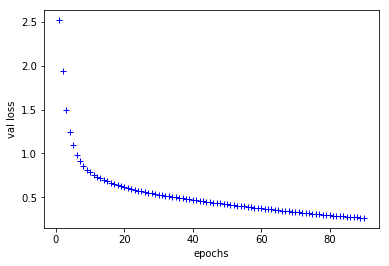

In [64]:
from matplotlib import pyplot as plt

plt.plot(np.arange(1,num_of_epochs+1),val_loss,'b+',label='val_loss')
plt.xlabel("epochs")
plt.ylabel("val loss")
plt.show()


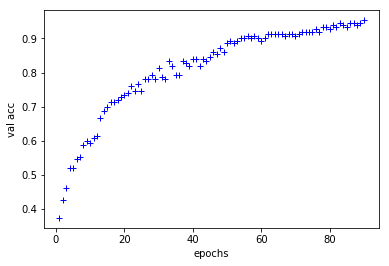

In [65]:
from matplotlib import pyplot as plt

plt.plot(np.arange(1,num_of_epochs+1),val_acc,'b+',label='val_acc')

plt.xlabel("epochs")
plt.ylabel("val acc")
plt.show()

In [68]:
from matplotlib import pyplot as plt

plt.plot(np.arange(1,num_of_epochs+1),train_acc,'b',label='train_acc')

plt.xlabel("epochs")
plt.ylabel("train acc")
plt.show()

ValueError: x and y must have same first dimension, but have shapes (90,) and (200,)

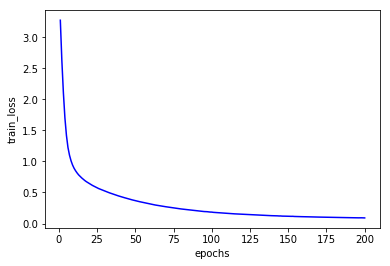

In [32]:
from matplotlib import pyplot as plt

plt.plot(np.arange(1,num_of_epochs+1),train_loss,'b',label='val_acc')

plt.xlabel("epochs")
plt.ylabel("train_loss")
plt.show()


In [38]:
val_loss=[]
train_loss=[]
acc=[]
val_acc=[]
np.random.seed(seed)
num_of_epochs=90
def model_define():
    model=models.Sequential()
    model.add(Dense(8,activation='relu',input_shape=(4,)))
    model.add(Dense(3,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])
    return model
skf=StratifiedKFold(n_splits=10,shuffle=True, random_state=seed)
skf.get_n_splits(X,encoded_y)
for train_index , test_index in skf.split(X, encoded_y):
    model=model_define()
    history=model.fit(X[train_index],dummy_y[train_index],epochs=num_of_epochs,batch_size=5,verbose=1,
                     validation_data=(X[test_index],dummy_y[test_index]))
    val_loss.append(history.history['val_loss'])
    train_loss.append(history.history['loss'])
    acc.append(history.history['acc'])
    val_acc.append(history.history['val_acc'])

Train on 135 samples, validate on 15 samples
Epoch 1/90
135/135 [==============================] - 3s 25ms/step - loss: 1.2349 - acc: 0.3333 - val_loss: 1.1797 - val_acc: 0.4000
Epoch 2/90
135/135 [==============================] - 0s 919us/step - loss: 1.1333 - acc: 0.4222 - val_loss: 1.0713 - val_acc: 0.6667
Epoch 3/90
135/135 [==============================] - 0s 844us/step - loss: 1.0507 - acc: 0.6444 - val_loss: 1.0087 - val_acc: 0.6667
Epoch 4/90
135/135 [==============================] - 0s 1ms/step - loss: 1.0113 - acc: 0.6593 - val_loss: 0.9716 - val_acc: 0.6667
Epoch 5/90
135/135 [==============================] - 0s 874us/step - loss: 0.9807 - acc: 0.6593 - val_loss: 0.9425 - val_acc: 0.6667
Epoch 6/90
135/135 [==============================] - 0s 870us/step - loss: 0.9514 - acc: 0.6593 - val_loss: 0.9144 - val_acc: 0.6667
Epoch 7/90
135/135 [==============================] - 0s 818us/step - loss: 0.9234 - acc: 0.6593 - val_loss: 0.8864 - val_acc: 0.6667
Epoch 8/90
135/135 [

135/135 [==============================] - 0s 959us/step - loss: 0.3218 - acc: 0.9556 - val_loss: 0.3475 - val_acc: 0.9333
Epoch 62/90
135/135 [==============================] - 0s 900us/step - loss: 0.3170 - acc: 0.9630 - val_loss: 0.3442 - val_acc: 0.9333
Epoch 63/90
135/135 [==============================] - 0s 904us/step - loss: 0.3133 - acc: 0.9704 - val_loss: 0.3423 - val_acc: 0.9333
Epoch 64/90
135/135 [==============================] - 0s 1ms/step - loss: 0.3098 - acc: 0.9778 - val_loss: 0.3396 - val_acc: 0.9333
Epoch 65/90
135/135 [==============================] - 0s 844us/step - loss: 0.3080 - acc: 0.9481 - val_loss: 0.3359 - val_acc: 0.9333
Epoch 66/90
135/135 [==============================] - 0s 996us/step - loss: 0.3021 - acc: 0.9630 - val_loss: 0.3336 - val_acc: 0.9333
Epoch 67/90
135/135 [==============================] - 0s 737us/step - loss: 0.2971 - acc: 0.9704 - val_loss: 0.3319 - val_acc: 0.9333
Epoch 68/90
135/135 [==============================] - 0s 763us/step 

135/135 [==============================] - 0s 996us/step - loss: 0.6655 - acc: 0.7037 - val_loss: 0.6889 - val_acc: 0.6667
Epoch 32/90
135/135 [==============================] - 0s 1ms/step - loss: 0.6556 - acc: 0.7259 - val_loss: 0.6816 - val_acc: 0.6667
Epoch 33/90
135/135 [==============================] - 0s 967us/step - loss: 0.6497 - acc: 0.7111 - val_loss: 0.6738 - val_acc: 0.6667
Epoch 34/90
135/135 [==============================] - 0s 989us/step - loss: 0.6431 - acc: 0.7704 - val_loss: 0.6671 - val_acc: 0.7333
Epoch 35/90
135/135 [==============================] - 0s 867us/step - loss: 0.6336 - acc: 0.7259 - val_loss: 0.6586 - val_acc: 0.7333
Epoch 36/90
135/135 [==============================] - 0s 1ms/step - loss: 0.6268 - acc: 0.7259 - val_loss: 0.6501 - val_acc: 0.6667
Epoch 37/90
135/135 [==============================] - 0s 981us/step - loss: 0.6175 - acc: 0.7407 - val_loss: 0.6442 - val_acc: 0.8000
Epoch 38/90
135/135 [==============================] - 0s 1ms/step - lo

135/135 [==============================] - 4s 27ms/step - loss: 3.7268 - acc: 0.3333 - val_loss: 3.1143 - val_acc: 0.3333
Epoch 2/90
135/135 [==============================] - 0s 648us/step - loss: 2.7917 - acc: 0.3333 - val_loss: 2.3028 - val_acc: 0.3333
Epoch 3/90
135/135 [==============================] - 0s 730us/step - loss: 2.0333 - acc: 0.3704 - val_loss: 1.6111 - val_acc: 0.6000
Epoch 4/90
135/135 [==============================] - 0s 681us/step - loss: 1.4032 - acc: 0.6593 - val_loss: 1.1429 - val_acc: 0.6667
Epoch 5/90
135/135 [==============================] - 0s 722us/step - loss: 0.9889 - acc: 0.6667 - val_loss: 0.8377 - val_acc: 0.6667
Epoch 6/90
135/135 [==============================] - 0s 693us/step - loss: 0.7535 - acc: 0.6667 - val_loss: 0.6847 - val_acc: 0.6667
Epoch 7/90
135/135 [==============================] - 0s 781us/step - loss: 0.6486 - acc: 0.6667 - val_loss: 0.6230 - val_acc: 0.7333
Epoch 8/90
135/135 [==============================] - 0s 733us/step - loss

Epoch 62/90
135/135 [==============================] - 0s 852us/step - loss: 0.1927 - acc: 0.9704 - val_loss: 0.1360 - val_acc: 1.0000
Epoch 63/90
135/135 [==============================] - 0s 833us/step - loss: 0.1912 - acc: 0.9630 - val_loss: 0.1329 - val_acc: 1.0000
Epoch 64/90
135/135 [==============================] - 0s 730us/step - loss: 0.1885 - acc: 0.9778 - val_loss: 0.1306 - val_acc: 1.0000
Epoch 65/90
135/135 [==============================] - ETA: 0s - loss: 0.1929 - acc: 0.964 - 0s 726us/step - loss: 0.1855 - acc: 0.9630 - val_loss: 0.1280 - val_acc: 1.0000
Epoch 66/90
135/135 [==============================] - 0s 1ms/step - loss: 0.1839 - acc: 0.9778 - val_loss: 0.1244 - val_acc: 1.0000
Epoch 67/90
135/135 [==============================] - 0s 815us/step - loss: 0.1814 - acc: 0.9704 - val_loss: 0.1213 - val_acc: 1.0000
Epoch 68/90
135/135 [==============================] - 0s 815us/step - loss: 0.1774 - acc: 0.9778 - val_loss: 0.1203 - val_acc: 1.0000
Epoch 69/90
135/135

Epoch 32/90
135/135 [==============================] - 0s 1ms/step - loss: 0.3403 - acc: 0.9556 - val_loss: 0.3934 - val_acc: 0.8667
Epoch 33/90
135/135 [==============================] - 0s 970us/step - loss: 0.3294 - acc: 0.9630 - val_loss: 0.3841 - val_acc: 0.8667
Epoch 34/90
135/135 [==============================] - 0s 911us/step - loss: 0.3220 - acc: 0.9630 - val_loss: 0.3795 - val_acc: 0.8667
Epoch 35/90
135/135 [==============================] - 0s 970us/step - loss: 0.3142 - acc: 0.9630 - val_loss: 0.3733 - val_acc: 0.8667
Epoch 36/90
135/135 [==============================] - 0s 1ms/step - loss: 0.3082 - acc: 0.9630 - val_loss: 0.3686 - val_acc: 0.8667
Epoch 37/90
135/135 [==============================] - 0s 1ms/step - loss: 0.2990 - acc: 0.9778 - val_loss: 0.3602 - val_acc: 0.8667
Epoch 38/90
135/135 [==============================] - 0s 1ms/step - loss: 0.2948 - acc: 0.9556 - val_loss: 0.3557 - val_acc: 0.8667
Epoch 39/90
135/135 [==============================] - 0s 833us

135/135 [==============================] - 0s 933us/step - loss: 3.5531 - acc: 0.3333 - val_loss: 3.3709 - val_acc: 0.3333
Epoch 3/90
135/135 [==============================] - 0s 1ms/step - loss: 2.9378 - acc: 0.3333 - val_loss: 2.7913 - val_acc: 0.3333
Epoch 4/90
135/135 [==============================] - 0s 1000us/step - loss: 2.4516 - acc: 0.3333 - val_loss: 2.3410 - val_acc: 0.3333
Epoch 5/90
135/135 [==============================] - 0s 1ms/step - loss: 2.0827 - acc: 0.3333 - val_loss: 2.0156 - val_acc: 0.3333
Epoch 6/90
135/135 [==============================] - 0s 1ms/step - loss: 1.8260 - acc: 0.3333 - val_loss: 1.7738 - val_acc: 0.3333
Epoch 7/90
135/135 [==============================] - 0s 1ms/step - loss: 1.6374 - acc: 0.3333 - val_loss: 1.6215 - val_acc: 0.3333
Epoch 8/90
135/135 [==============================] - 0s 1ms/step - loss: 1.5145 - acc: 0.3333 - val_loss: 1.4901 - val_acc: 0.3333
Epoch 9/90
135/135 [==============================] - 0s 1ms/step - loss: 1.4090 -

135/135 [==============================] - 0s 1000us/step - loss: 0.8540 - acc: 0.6667 - val_loss: 0.8217 - val_acc: 0.6667
Epoch 64/90
135/135 [==============================] - 0s 915us/step - loss: 0.8385 - acc: 0.6667 - val_loss: 0.8065 - val_acc: 0.6667
Epoch 65/90
135/135 [==============================] - 0s 807us/step - loss: 0.8255 - acc: 0.6667 - val_loss: 0.7923 - val_acc: 0.6667
Epoch 66/90
135/135 [==============================] - 0s 826us/step - loss: 0.8111 - acc: 0.6667 - val_loss: 0.7771 - val_acc: 0.6667
Epoch 67/90
135/135 [==============================] - 0s 793us/step - loss: 0.7960 - acc: 0.6667 - val_loss: 0.7623 - val_acc: 0.6667
Epoch 68/90
135/135 [==============================] - 0s 811us/step - loss: 0.7826 - acc: 0.6667 - val_loss: 0.7471 - val_acc: 0.6667
Epoch 69/90
135/135 [==============================] - 0s 807us/step - loss: 0.7706 - acc: 0.6667 - val_loss: 0.7318 - val_acc: 0.6667
Epoch 70/90
135/135 [==============================] - 0s 833us/st

Epoch 34/90
135/135 [==============================] - 0s 918us/step - loss: 0.4178 - acc: 0.8667 - val_loss: 0.3628 - val_acc: 1.0000
Epoch 35/90
135/135 [==============================] - 0s 1ms/step - loss: 0.4136 - acc: 0.8815 - val_loss: 0.3559 - val_acc: 1.0000
Epoch 36/90
135/135 [==============================] - 0s 1ms/step - loss: 0.4080 - acc: 0.8815 - val_loss: 0.3493 - val_acc: 1.0000
Epoch 37/90
135/135 [==============================] - 0s 993us/step - loss: 0.4025 - acc: 0.8815 - val_loss: 0.3449 - val_acc: 1.0000
Epoch 38/90
135/135 [==============================] - 0s 893us/step - loss: 0.3979 - acc: 0.8815 - val_loss: 0.3400 - val_acc: 1.0000
Epoch 39/90
135/135 [==============================] - 0s 1ms/step - loss: 0.3953 - acc: 0.8889 - val_loss: 0.3348 - val_acc: 1.0000
Epoch 40/90
135/135 [==============================] - 0s 1ms/step - loss: 0.3885 - acc: 0.8889 - val_loss: 0.3287 - val_acc: 1.0000
Epoch 41/90
135/135 [==============================] - 0s 1ms/s

135/135 [==============================] - ETA: 0s - loss: 1.1193 - acc: 0.388 - 0s 667us/step - loss: 1.0356 - acc: 0.4370 - val_loss: 1.0494 - val_acc: 0.4000
Epoch 5/90
135/135 [==============================] - 0s 670us/step - loss: 0.9019 - acc: 0.5407 - val_loss: 0.9612 - val_acc: 0.5333
Epoch 6/90
135/135 [==============================] - 0s 685us/step - loss: 0.8296 - acc: 0.5778 - val_loss: 0.8971 - val_acc: 0.6000
Epoch 7/90
135/135 [==============================] - 0s 681us/step - loss: 0.7739 - acc: 0.6296 - val_loss: 0.8470 - val_acc: 0.4667
Epoch 8/90
135/135 [==============================] - ETA: 0s - loss: 0.7289 - acc: 0.680 - 0s 785us/step - loss: 0.7280 - acc: 0.6444 - val_loss: 0.8007 - val_acc: 0.4667
Epoch 9/90
135/135 [==============================] - 0s 815us/step - loss: 0.6881 - acc: 0.6222 - val_loss: 0.7679 - val_acc: 0.4000
Epoch 10/90
135/135 [==============================] - 0s 781us/step - loss: 0.6566 - acc: 0.6667 - val_loss: 0.7393 - val_acc: 0.4

135/135 [==============================] - 0s 785us/step - loss: 0.1945 - acc: 0.9630 - val_loss: 0.3442 - val_acc: 0.8667
Epoch 65/90
135/135 [==============================] - 0s 759us/step - loss: 0.1932 - acc: 0.9630 - val_loss: 0.3407 - val_acc: 0.8667
Epoch 66/90
135/135 [==============================] - 0s 796us/step - loss: 0.1944 - acc: 0.9481 - val_loss: 0.3344 - val_acc: 0.8667
Epoch 67/90
135/135 [==============================] - 0s 711us/step - loss: 0.1906 - acc: 0.9704 - val_loss: 0.3367 - val_acc: 0.8667
Epoch 68/90
135/135 [==============================] - 0s 704us/step - loss: 0.1862 - acc: 0.9630 - val_loss: 0.3340 - val_acc: 0.8667
Epoch 69/90
135/135 [==============================] - 0s 737us/step - loss: 0.1847 - acc: 0.9556 - val_loss: 0.3260 - val_acc: 0.8667
Epoch 70/90
135/135 [==============================] - 0s 715us/step - loss: 0.1816 - acc: 0.9630 - val_loss: 0.3344 - val_acc: 0.8000
Epoch 71/90
135/135 [==============================] - 0s 748us/ste

135/135 [==============================] - 0s 963us/step - loss: 0.5530 - acc: 0.7481 - val_loss: 0.5526 - val_acc: 0.7333
Epoch 35/90
135/135 [==============================] - 0s 930us/step - loss: 0.5433 - acc: 0.7630 - val_loss: 0.5463 - val_acc: 0.6667
Epoch 36/90
135/135 [==============================] - 0s 878us/step - loss: 0.5368 - acc: 0.7481 - val_loss: 0.5388 - val_acc: 0.6667
Epoch 37/90
135/135 [==============================] - 0s 1ms/step - loss: 0.5263 - acc: 0.7926 - val_loss: 0.5295 - val_acc: 0.8667
Epoch 38/90
135/135 [==============================] - 0s 1ms/step - loss: 0.5195 - acc: 0.8000 - val_loss: 0.5235 - val_acc: 0.8000
Epoch 39/90
135/135 [==============================] - 0s 1ms/step - loss: 0.5140 - acc: 0.7926 - val_loss: 0.5162 - val_acc: 0.8667
Epoch 40/90
135/135 [==============================] - 0s 1ms/step - loss: 0.5063 - acc: 0.7852 - val_loss: 0.5104 - val_acc: 0.8667
Epoch 41/90
135/135 [==============================] - 0s 896us/step - loss

Epoch 5/90
135/135 [==============================] - 0s 959us/step - loss: 0.7426 - acc: 0.6667 - val_loss: 0.6979 - val_acc: 0.6667
Epoch 6/90
135/135 [==============================] - 0s 844us/step - loss: 0.6843 - acc: 0.6667 - val_loss: 0.6469 - val_acc: 0.8000
Epoch 7/90
135/135 [==============================] - 0s 767us/step - loss: 0.6431 - acc: 0.7111 - val_loss: 0.6085 - val_acc: 0.8000
Epoch 8/90
135/135 [==============================] - 0s 793us/step - loss: 0.6094 - acc: 0.7481 - val_loss: 0.5801 - val_acc: 0.8667
Epoch 9/90
135/135 [==============================] - 0s 778us/step - loss: 0.5896 - acc: 0.8148 - val_loss: 0.5619 - val_acc: 0.8667
Epoch 10/90
135/135 [==============================] - 0s 1ms/step - loss: 0.5688 - acc: 0.7852 - val_loss: 0.5438 - val_acc: 0.8000
Epoch 11/90
135/135 [==============================] - 0s 1ms/step - loss: 0.5543 - acc: 0.7704 - val_loss: 0.5303 - val_acc: 0.8667
Epoch 12/90
135/135 [==============================] - 0s 878us/

135/135 [==============================] - 0s 1ms/step - loss: 0.2527 - acc: 0.9556 - val_loss: 0.2213 - val_acc: 1.0000
Epoch 67/90
135/135 [==============================] - 0s 844us/step - loss: 0.2493 - acc: 0.9704 - val_loss: 0.2189 - val_acc: 1.0000
Epoch 68/90
135/135 [==============================] - 0s 974us/step - loss: 0.2476 - acc: 0.9556 - val_loss: 0.2130 - val_acc: 1.0000
Epoch 69/90
135/135 [==============================] - 0s 922us/step - loss: 0.2424 - acc: 0.9704 - val_loss: 0.2099 - val_acc: 1.0000
Epoch 70/90
135/135 [==============================] - 0s 1ms/step - loss: 0.2406 - acc: 0.9704 - val_loss: 0.2015 - val_acc: 1.0000
Epoch 71/90
135/135 [==============================] - 0s 822us/step - loss: 0.2378 - acc: 0.9630 - val_loss: 0.2064 - val_acc: 1.0000
Epoch 72/90
135/135 [==============================] - 0s 941us/step - loss: 0.2336 - acc: 0.9704 - val_loss: 0.2045 - val_acc: 1.0000
Epoch 73/90
135/135 [==============================] - 0s 889us/step - 

Epoch 37/90
135/135 [==============================] - 0s 896us/step - loss: 0.4139 - acc: 0.9185 - val_loss: 0.4337 - val_acc: 0.8667
Epoch 38/90
135/135 [==============================] - 0s 781us/step - loss: 0.4099 - acc: 0.9111 - val_loss: 0.4293 - val_acc: 0.8667
Epoch 39/90
135/135 [==============================] - 0s 689us/step - loss: 0.4054 - acc: 0.9259 - val_loss: 0.4247 - val_acc: 0.8667
Epoch 40/90
135/135 [==============================] - 0s 685us/step - loss: 0.4010 - acc: 0.9111 - val_loss: 0.4204 - val_acc: 0.9333
Epoch 41/90
135/135 [==============================] - 0s 881us/step - loss: 0.4016 - acc: 0.8741 - val_loss: 0.4167 - val_acc: 0.8667
Epoch 42/90
135/135 [==============================] - 0s 844us/step - loss: 0.3974 - acc: 0.9333 - val_loss: 0.4121 - val_acc: 0.9333
Epoch 43/90
135/135 [==============================] - 0s 1ms/step - loss: 0.3895 - acc: 0.9111 - val_loss: 0.4083 - val_acc: 0.9333
Epoch 44/90
135/135 [==============================] - 0s

In [39]:
val_loss=np.mean(val_loss,axis=0)
val_acc=np.mean(val_acc,axis=0)

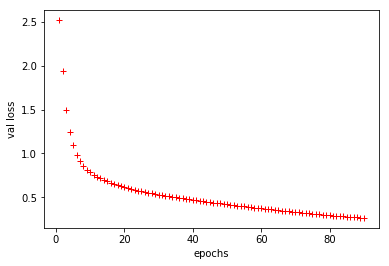

In [62]:
from matplotlib import pyplot as plt

plt.plot(np.arange(1,num_of_epochs+1),val_loss,'r+',label='val_loss')
plt.xlabel("epochs")
plt.ylabel("val loss")
plt.show()

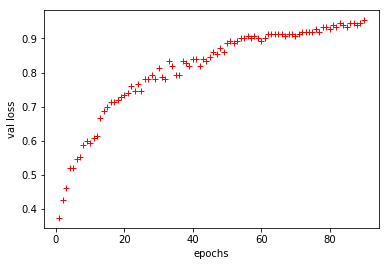

In [63]:
from matplotlib import pyplot as plt

plt.plot(np.arange(1,num_of_epochs+1),val_acc,'r+',label='val_loss')
plt.xlabel("epochs")
plt.ylabel("val loss")
plt.show()

In [42]:
np.mean(val_acc)

0.8128148176493468

In [47]:
def create_baseline_2():
    inputs=keras.Input(shape=(4,))
    x=Dense(8,activation='relu')(inputs)
    outputs=Dense(3,activation='softmax')(x)

    model=keras.Model(inputs,outputs)
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

np.random.seed(seed)

estimator=KerasClassifier(build_fn=create_baseline_2,epochs=90,batch_size=5,verbose=1)
kfold=KFold(n_splits=10,random_state=seed,shuffle=True)
results=cross_val_score(estimator,X,dummy_y,cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/90
135/135 [==============================] - 3s 24ms/step - loss: 1.2207 - acc: 0.3333
Epoch 2/90
135/135 [==============================] - 0s 785us/step - loss: 1.1143 - acc: 0.4741
Epoch 3/90
135/135 [==============================] - 0s 911us/step - loss: 1.0351 - acc: 0.6815
Epoch 4/90
135/135 [==============================] - 0s 856us/step - loss: 0.9965 - acc: 0.6815
Epoch 5/90
135/135 [==============================] - 0s 930us/step - loss: 0.9661 - acc: 0.6815
Epoch 6/90
135/135 [==============================] - 0s 911us/step - loss: 0.9361 - acc: 0.6815
Epoch 7/90
135/135 [==============================] - 0s 859us/step - loss: 0.9078 - acc: 0.6815
Epoch 8/90
135/135 [==============================] - 0s 959us/step - loss: 0.8791 - acc: 0.6815
Epoch 9/90
135/135 [==============================] - ETA: 0s - loss: 0.8476 - acc: 0.696 - 0s 933us/step - loss: 0.8513 - acc: 0.6815
Epoch 10/90
135/135 [==============================] - 0s 970us/step - loss: 0.8252 - acc:

135/135 [==============================] - 0s 911us/step - loss: 0.2424 - acc: 0.9630
Epoch 85/90
135/135 [==============================] - 0s 856us/step - loss: 0.2390 - acc: 0.9704
Epoch 86/90
135/135 [==============================] - 0s 896us/step - loss: 0.2362 - acc: 0.9704
Epoch 87/90
135/135 [==============================] - 0s 737us/step - loss: 0.2337 - acc: 0.9704
Epoch 88/90
135/135 [==============================] - 0s 959us/step - loss: 0.2323 - acc: 0.9704
Epoch 89/90
135/135 [==============================] - 0s 1ms/step - loss: 0.2290 - acc: 0.9704
Epoch 90/90
15/15 [==============================] - 2s 102ms/step
Epoch 1/90
135/135 [==============================] - 4s 30ms/step - loss: 1.6596 - acc: 0.3111
Epoch 2/90
135/135 [==============================] - 0s 1ms/step - loss: 1.3626 - acc: 0.3111
Epoch 3/90
135/135 [==============================] - 0s 1ms/step - loss: 1.1839 - acc: 0.3111
Epoch 4/90
135/135 [==============================] - 0s 1ms/step - loss:

135/135 [==============================] - 0s 930us/step - loss: 0.4036 - acc: 0.9185
Epoch 77/90
135/135 [==============================] - 0s 978us/step - loss: 0.3963 - acc: 0.8815
Epoch 78/90
135/135 [==============================] - 0s 1ms/step - loss: 0.3912 - acc: 0.9111
Epoch 79/90
135/135 [==============================] - 0s 1ms/step - loss: 0.3894 - acc: 0.9333
Epoch 80/90
135/135 [==============================] - 0s 804us/step - loss: 0.3855 - acc: 0.8741
Epoch 81/90
135/135 [==============================] - 0s 778us/step - loss: 0.3809 - acc: 0.9259
Epoch 82/90
135/135 [==============================] - 0s 770us/step - loss: 0.3787 - acc: 0.9407
Epoch 83/90
135/135 [==============================] - 0s 1ms/step - loss: 0.3755 - acc: 0.9407
Epoch 84/90
135/135 [==============================] - 0s 1ms/step - loss: 0.3728 - acc: 0.9556
Epoch 85/90
135/135 [==============================] - 0s 807us/step - loss: 0.3689 - acc: 0.9481
Epoch 86/90
135/135 [===================

135/135 [==============================] - 0s 956us/step - loss: 0.1708 - acc: 0.9778
Epoch 70/90
135/135 [==============================] - 0s 1ms/step - loss: 0.1693 - acc: 0.9778
Epoch 71/90
135/135 [==============================] - 0s 937us/step - loss: 0.1677 - acc: 0.9778
Epoch 72/90
135/135 [==============================] - 0s 981us/step - loss: 0.1670 - acc: 0.9630
Epoch 73/90
135/135 [==============================] - 0s 1ms/step - loss: 0.1637 - acc: 0.9704
Epoch 74/90
135/135 [==============================] - 0s 1ms/step - loss: 0.1604 - acc: 0.9778
Epoch 75/90
135/135 [==============================] - 0s 1ms/step - loss: 0.1605 - acc: 0.9704
Epoch 76/90
135/135 [==============================] - 0s 763us/step - loss: 0.1585 - acc: 0.9704
Epoch 77/90
135/135 [==============================] - 0s 915us/step - loss: 0.1573 - acc: 0.9704
Epoch 78/90
135/135 [==============================] - 0s 1ms/step - loss: 0.1551 - acc: 0.9704
Epoch 79/90
135/135 [=====================

135/135 [==============================] - 0s 963us/step - loss: 0.2107 - acc: 0.9704
Epoch 62/90
135/135 [==============================] - 0s 933us/step - loss: 0.2040 - acc: 0.9704 0s - loss: 0.2154 - acc: 0.95
Epoch 63/90
135/135 [==============================] - 0s 830us/step - loss: 0.2027 - acc: 0.9704
Epoch 64/90
135/135 [==============================] - 0s 930us/step - loss: 0.1992 - acc: 0.9630
Epoch 65/90
135/135 [==============================] - 0s 830us/step - loss: 0.1958 - acc: 0.9704
Epoch 66/90
135/135 [==============================] - 0s 767us/step - loss: 0.1934 - acc: 0.9704
Epoch 67/90
135/135 [==============================] - 0s 841us/step - loss: 0.1926 - acc: 0.9556
Epoch 68/90
135/135 [==============================] - 0s 789us/step - loss: 0.1914 - acc: 0.9704
Epoch 69/90
135/135 [==============================] - 0s 815us/step - loss: 0.1875 - acc: 0.9704
Epoch 70/90
135/135 [==============================] - 0s 878us/step - loss: 0.1832 - acc: 0.9704
Ep

135/135 [==============================] - 0s 867us/step - loss: 0.9734 - acc: 0.5185
Epoch 54/90
135/135 [==============================] - 0s 796us/step - loss: 0.9637 - acc: 0.6519
Epoch 55/90
135/135 [==============================] - 0s 785us/step - loss: 0.9538 - acc: 0.6519
Epoch 56/90
135/135 [==============================] - 0s 763us/step - loss: 0.9443 - acc: 0.6593
Epoch 57/90
135/135 [==============================] - 0s 793us/step - loss: 0.9341 - acc: 0.6593
Epoch 58/90
135/135 [==============================] - 0s 878us/step - loss: 0.9225 - acc: 0.6593
Epoch 59/90
135/135 [==============================] - 0s 782us/step - loss: 0.9095 - acc: 0.6593
Epoch 60/90
135/135 [==============================] - 0s 770us/step - loss: 0.8978 - acc: 0.6593
Epoch 61/90
135/135 [==============================] - 0s 852us/step - loss: 0.8852 - acc: 0.6593
Epoch 62/90
135/135 [==============================] - 0s 826us/step - loss: 0.8724 - acc: 0.6593
Epoch 63/90
135/135 [===========

135/135 [==============================] - 0s 982us/step - loss: 0.3678 - acc: 0.8815
Epoch 47/90
135/135 [==============================] - 0s 915us/step - loss: 0.3634 - acc: 0.8963
Epoch 48/90
135/135 [==============================] - 0s 989us/step - loss: 0.3598 - acc: 0.9111
Epoch 49/90
135/135 [==============================] - 0s 926us/step - loss: 0.3556 - acc: 0.8889
Epoch 50/90
135/135 [==============================] - 0s 959us/step - loss: 0.3507 - acc: 0.9111
Epoch 51/90
135/135 [==============================] - 0s 952us/step - loss: 0.3461 - acc: 0.9111
Epoch 52/90
135/135 [==============================] - 0s 1ms/step - loss: 0.3447 - acc: 0.8963
Epoch 53/90
135/135 [==============================] - 0s 1ms/step - loss: 0.3422 - acc: 0.8963
Epoch 54/90
135/135 [==============================] - 0s 1ms/step - loss: 0.3404 - acc: 0.9111
Epoch 55/90
135/135 [==============================] - 0s 993us/step - loss: 0.3416 - acc: 0.8963
Epoch 56/90
135/135 [=================

135/135 [==============================] - 0s 911us/step - loss: 0.3399 - acc: 0.8815
Epoch 40/90
135/135 [==============================] - ETA: 0s - loss: 0.3432 - acc: 0.904 - 0s 970us/step - loss: 0.3316 - acc: 0.9111
Epoch 41/90
135/135 [==============================] - 0s 907us/step - loss: 0.3294 - acc: 0.8963
Epoch 42/90
135/135 [==============================] - 0s 1ms/step - loss: 0.3212 - acc: 0.8963
Epoch 43/90
135/135 [==============================] - 0s 885us/step - loss: 0.3123 - acc: 0.9037
Epoch 44/90
135/135 [==============================] - 0s 848us/step - loss: 0.3090 - acc: 0.9259
Epoch 45/90
135/135 [==============================] - 0s 941us/step - loss: 0.3041 - acc: 0.9185
Epoch 46/90
135/135 [==============================] - 0s 1ms/step - loss: 0.2976 - acc: 0.9037
Epoch 47/90
135/135 [==============================] - 0s 963us/step - loss: 0.2934 - acc: 0.9259
Epoch 48/90
135/135 [==============================] - 0s 922us/step - loss: 0.2969 - acc: 0.911

135/135 [==============================] - 0s 759us/step - loss: 0.5841 - acc: 0.7111
Epoch 32/90
135/135 [==============================] - 0s 785us/step - loss: 0.5744 - acc: 0.7481
Epoch 33/90
135/135 [==============================] - 0s 741us/step - loss: 0.5700 - acc: 0.7185
Epoch 34/90
135/135 [==============================] - 0s 822us/step - loss: 0.5582 - acc: 0.7259
Epoch 35/90
135/135 [==============================] - 0s 756us/step - loss: 0.5483 - acc: 0.7704
Epoch 36/90
135/135 [==============================] - 0s 741us/step - loss: 0.5404 - acc: 0.7556
Epoch 37/90
135/135 [==============================] - 0s 737us/step - loss: 0.5304 - acc: 0.7926
Epoch 38/90
135/135 [==============================] - 0s 726us/step - loss: 0.5231 - acc: 0.8074
Epoch 39/90
135/135 [==============================] - 0s 741us/step - loss: 0.5174 - acc: 0.8000
Epoch 40/90
135/135 [==============================] - 0s 863us/step - loss: 0.5097 - acc: 0.7926
Epoch 41/90
135/135 [===========

135/135 [==============================] - 0s 933us/step - loss: 0.4280 - acc: 0.9111
Epoch 25/90
135/135 [==============================] - 0s 1000us/step - loss: 0.4219 - acc: 0.9037
Epoch 26/90
135/135 [==============================] - 0s 970us/step - loss: 0.4151 - acc: 0.9111
Epoch 27/90
135/135 [==============================] - 0s 978us/step - loss: 0.4103 - acc: 0.8815
Epoch 28/90
135/135 [==============================] - 0s 989us/step - loss: 0.4048 - acc: 0.9037
Epoch 29/90
135/135 [==============================] - 0s 1ms/step - loss: 0.3986 - acc: 0.9259A: 0s - loss: 0.3710 - acc: 0.92
Epoch 30/90
135/135 [==============================] - 0s 996us/step - loss: 0.3934 - acc: 0.9111
Epoch 31/90
135/135 [==============================] - 0s 941us/step - loss: 0.3888 - acc: 0.9259
Epoch 32/90
135/135 [==============================] - 0s 915us/step - loss: 0.3838 - acc: 0.9333
Epoch 33/90
135/135 [==============================] - 0s 937us/step - loss: 0.3780 - acc: 0.9185
E

135/135 [==============================] - 0s 867us/step - loss: 0.5430 - acc: 0.8222
Epoch 17/90
135/135 [==============================] - 0s 867us/step - loss: 0.5333 - acc: 0.8148
Epoch 18/90
135/135 [==============================] - 0s 1ms/step - loss: 0.5247 - acc: 0.8222
Epoch 19/90
135/135 [==============================] - 0s 1ms/step - loss: 0.5156 - acc: 0.7556
Epoch 20/90
135/135 [==============================] - 0s 893us/step - loss: 0.5047 - acc: 0.8148
Epoch 21/90
135/135 [==============================] - 0s 1ms/step - loss: 0.4983 - acc: 0.8593
Epoch 22/90
135/135 [==============================] - 0s 1ms/step - loss: 0.4907 - acc: 0.8593A: 0s - loss: 0.4727 - acc: 0.866
Epoch 23/90
135/135 [==============================] - 0s 948us/step - loss: 0.4847 - acc: 0.8741
Epoch 24/90
135/135 [==============================] - 0s 748us/step - loss: 0.4778 - acc: 0.8815
Epoch 25/90
135/135 [==============================] - 0s 774us/step - loss: 0.4711 - acc: 0.8519
Epoch 2

In [57]:
import tensorflow as tf
def create_baseline_3():
    class MyModel(tf. keras.Model):
        def __init__(self):
            super(MyModel,self).__init__()
            self.dense1 = Dense(16, activation="relu")
            self.dense2 = Dense(8, activation='relu')
            self.dense3 = Dense(3, activation='softmax')


        def call(self,inputs):
            x = self.dense1(inputs)
            x = self.dense2(x)
            return self.dense3(x)

    model=MyModel()
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

np.random.seed(seed)

estimator=KerasClassifier(build_fn=create_baseline_3,epochs=200,batch_size=5,verbose=1)
kfold=KFold(n_splits=10,random_state=seed,shuffle=True)
results=cross_val_score(estimator,X,dummy_y,cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/200
135/135 [==============================] - 5s 34ms/step - loss: 1.3781 - acc: 0.2444
Epoch 2/200
135/135 [==============================] - 0s 782us/step - loss: 1.3781 - acc: 0.2444
Epoch 3/200
135/135 [==============================] - 0s 733us/step - loss: 1.3781 - acc: 0.2444
Epoch 4/200
135/135 [==============================] - 0s 818us/step - loss: 1.3781 - acc: 0.2444
Epoch 5/200
135/135 [==============================] - 0s 770us/step - loss: 1.3781 - acc: 0.2444
Epoch 6/200
135/135 [==============================] - 0s 781us/step - loss: 1.3781 - acc: 0.2444
Epoch 7/200
135/135 [==============================] - 0s 756us/step - loss: 1.3781 - acc: 0.2444
Epoch 8/200
135/135 [==============================] - 0s 848us/step - loss: 1.3781 - acc: 0.2444
Epoch 9/200
135/135 [==============================] - 0s 759us/step - loss: 1.3781 - acc: 0.2444
Epoch 10/200
135/135 [==============================] - 0s 782us/step - loss: 1.3781 - acc: 0.2444
Epoch 11/200
135/135

135/135 [==============================] - 0s 811us/step - loss: 1.3781 - acc: 0.2444
Epoch 84/200
135/135 [==============================] - 0s 815us/step - loss: 1.3781 - acc: 0.2444
Epoch 85/200
135/135 [==============================] - 0s 781us/step - loss: 1.3781 - acc: 0.2444
Epoch 86/200
135/135 [==============================] - 0s 800us/step - loss: 1.3781 - acc: 0.2444
Epoch 87/200
135/135 [==============================] - 0s 770us/step - loss: 1.3781 - acc: 0.2444
Epoch 88/200
135/135 [==============================] - 0s 707us/step - loss: 1.3781 - acc: 0.2444
Epoch 89/200
135/135 [==============================] - 0s 785us/step - loss: 1.3781 - acc: 0.2444
Epoch 90/200
135/135 [==============================] - 0s 722us/step - loss: 1.3781 - acc: 0.2444
Epoch 91/200
135/135 [==============================] - 0s 744us/step - loss: 1.3781 - acc: 0.2444
Epoch 92/200
135/135 [==============================] - 0s 726us/step - loss: 1.3781 - acc: 0.2444
Epoch 93/200
135/135 [=

135/135 [==============================] - 0s 770us/step - loss: 1.3781 - acc: 0.2444
Epoch 165/200
135/135 [==============================] - 0s 774us/step - loss: 1.3781 - acc: 0.2444
Epoch 166/200
135/135 [==============================] - 0s 741us/step - loss: 1.3781 - acc: 0.2444
Epoch 167/200
135/135 [==============================] - 0s 711us/step - loss: 1.3781 - acc: 0.2444
Epoch 168/200
135/135 [==============================] - 0s 756us/step - loss: 1.3781 - acc: 0.2444
Epoch 169/200
135/135 [==============================] - 0s 711us/step - loss: 1.3781 - acc: 0.2444
Epoch 170/200
135/135 [==============================] - 0s 744us/step - loss: 1.3781 - acc: 0.2444
Epoch 171/200
135/135 [==============================] - ETA: 0s - loss: 1.4284 - acc: 0.212 - 0s 726us/step - loss: 1.3781 - acc: 0.2444
Epoch 172/200
135/135 [==============================] - 0s 789us/step - loss: 1.3781 - acc: 0.2444
Epoch 173/200
135/135 [==============================] - 0s 785us/step - los

135/135 [==============================] - 0s 737us/step - loss: 4.1950 - acc: 0.3333
Epoch 46/200
135/135 [==============================] - 0s 726us/step - loss: 4.1950 - acc: 0.3333
Epoch 47/200
135/135 [==============================] - 0s 770us/step - loss: 4.1950 - acc: 0.3333
Epoch 48/200
135/135 [==============================] - 0s 874us/step - loss: 4.1950 - acc: 0.3333
Epoch 49/200
135/135 [==============================] - 0s 807us/step - loss: 4.1950 - acc: 0.3333
Epoch 50/200
135/135 [==============================] - 0s 778us/step - loss: 4.1950 - acc: 0.3333
Epoch 51/200
135/135 [==============================] - 0s 730us/step - loss: 4.1950 - acc: 0.3333
Epoch 52/200
135/135 [==============================] - 0s 719us/step - loss: 4.1950 - acc: 0.3333
Epoch 53/200
135/135 [==============================] - 0s 722us/step - loss: 4.1950 - acc: 0.3333
Epoch 54/200
135/135 [==============================] - 0s 733us/step - loss: 4.1950 - acc: 0.3333
Epoch 55/200
135/135 [=

135/135 [==============================] - 0s 848us/step - loss: 4.1950 - acc: 0.3333
Epoch 128/200
135/135 [==============================] - 0s 759us/step - loss: 4.1950 - acc: 0.3333
Epoch 129/200
135/135 [==============================] - 0s 785us/step - loss: 4.1950 - acc: 0.3333
Epoch 130/200
135/135 [==============================] - 0s 859us/step - loss: 4.1950 - acc: 0.3333
Epoch 131/200
135/135 [==============================] - 0s 781us/step - loss: 4.1950 - acc: 0.3333
Epoch 132/200
135/135 [==============================] - 0s 700us/step - loss: 4.1950 - acc: 0.3333
Epoch 133/200
135/135 [==============================] - 0s 748us/step - loss: 4.1950 - acc: 0.3333
Epoch 134/200
135/135 [==============================] - 0s 767us/step - loss: 4.1950 - acc: 0.3333
Epoch 135/200
135/135 [==============================] - 0s 726us/step - loss: 4.1950 - acc: 0.3333
Epoch 136/200
135/135 [==============================] - 0s 737us/step - loss: 4.1950 - acc: 0.3333
Epoch 137/200


135/135 [==============================] - 0s 778us/step - loss: 2.8626 - acc: 0.3259
Epoch 9/200
135/135 [==============================] - 0s 881us/step - loss: 2.8626 - acc: 0.3259
Epoch 10/200
135/135 [==============================] - 0s 830us/step - loss: 2.8626 - acc: 0.3259
Epoch 11/200
135/135 [==============================] - 0s 796us/step - loss: 2.8626 - acc: 0.3259
Epoch 12/200
135/135 [==============================] - 0s 704us/step - loss: 2.8626 - acc: 0.3259
Epoch 13/200
135/135 [==============================] - 0s 733us/step - loss: 2.8626 - acc: 0.3259
Epoch 14/200
135/135 [==============================] - 0s 811us/step - loss: 2.8626 - acc: 0.3259
Epoch 15/200
135/135 [==============================] - 0s 770us/step - loss: 2.8626 - acc: 0.3259
Epoch 16/200
135/135 [==============================] - 0s 696us/step - loss: 2.8626 - acc: 0.3259
Epoch 17/200
135/135 [==============================] - ETA: 0s - loss: 2.9484 - acc: 0.2933    - 0s 737us/step - loss: 2.8

Epoch 89/200
135/135 [==============================] - 0s 700us/step - loss: 2.8626 - acc: 0.3259
Epoch 90/200
135/135 [==============================] - 0s 711us/step - loss: 2.8626 - acc: 0.3259
Epoch 91/200
135/135 [==============================] - 0s 707us/step - loss: 2.8626 - acc: 0.3259
Epoch 92/200
135/135 [==============================] - 0s 737us/step - loss: 2.8626 - acc: 0.3259
Epoch 93/200
135/135 [==============================] - 0s 744us/step - loss: 2.8626 - acc: 0.3259
Epoch 94/200
135/135 [==============================] - 0s 737us/step - loss: 2.8626 - acc: 0.3259
Epoch 95/200
135/135 [==============================] - 0s 678us/step - loss: 2.8626 - acc: 0.3259
Epoch 96/200
135/135 [==============================] - 0s 774us/step - loss: 2.8626 - acc: 0.3259
Epoch 97/200
135/135 [==============================] - 0s 659us/step - loss: 2.8626 - acc: 0.3259
Epoch 98/200
135/135 [==============================] - 0s 719us/step - loss: 2.8626 - acc: 0.3259
Epoch 99/2

135/135 [==============================] - 0s 767us/step - loss: 2.8626 - acc: 0.3259
Epoch 169/200
135/135 [==============================] - 0s 737us/step - loss: 2.8626 - acc: 0.3259
Epoch 170/200
135/135 [==============================] - ETA: 0s - loss: 3.0896 - acc: 0.266 - 0s 730us/step - loss: 2.8626 - acc: 0.3259
Epoch 171/200
135/135 [==============================] - 0s 763us/step - loss: 2.8626 - acc: 0.3259
Epoch 172/200
135/135 [==============================] - 0s 711us/step - loss: 2.8626 - acc: 0.3259
Epoch 173/200
135/135 [==============================] - 0s 733us/step - loss: 2.8626 - acc: 0.3259
Epoch 174/200
135/135 [==============================] - 0s 767us/step - loss: 2.8626 - acc: 0.3259
Epoch 175/200
135/135 [==============================] - 0s 718us/step - loss: 2.8626 - acc: 0.3259
Epoch 176/200
135/135 [==============================] - 0s 730us/step - loss: 2.8626 - acc: 0.3259
Epoch 177/200
135/135 [==============================] - 0s 741us/step - los

135/135 [==============================] - 0s 767us/step - loss: 2.1307 - acc: 0.0000e+00
Epoch 48/200
135/135 [==============================] - 0s 778us/step - loss: 2.1307 - acc: 0.0000e+00
Epoch 49/200
135/135 [==============================] - 0s 726us/step - loss: 2.1307 - acc: 0.0000e+00
Epoch 50/200
135/135 [==============================] - 0s 744us/step - loss: 2.1307 - acc: 0.0000e+00
Epoch 51/200
135/135 [==============================] - 0s 752us/step - loss: 2.1307 - acc: 0.0000e+00
Epoch 52/200
135/135 [==============================] - 0s 756us/step - loss: 2.1307 - acc: 0.0000e+00
Epoch 53/200
135/135 [==============================] - 0s 737us/step - loss: 2.1307 - acc: 0.0000e+00
Epoch 54/200
135/135 [==============================] - 0s 922us/step - loss: 2.1307 - acc: 0.0000e+00
Epoch 55/200
135/135 [==============================] - 0s 748us/step - loss: 2.1307 - acc: 0.0000e+00
Epoch 56/200
135/135 [==============================] - 0s 756us/step - loss: 2.1307 -

135/135 [==============================] - 0s 796us/step - loss: 2.1307 - acc: 0.0000e+00
Epoch 127/200
135/135 [==============================] - 0s 778us/step - loss: 2.1307 - acc: 0.0000e+00
Epoch 128/200
135/135 [==============================] - 0s 818us/step - loss: 2.1307 - acc: 0.0000e+00
Epoch 129/200
135/135 [==============================] - 0s 719us/step - loss: 2.1307 - acc: 0.0000e+00
Epoch 130/200
135/135 [==============================] - 0s 1ms/step - loss: 2.1307 - acc: 0.0000e+00
Epoch 131/200
135/135 [==============================] - 0s 919us/step - loss: 2.1307 - acc: 0.0000e+00
Epoch 132/200
135/135 [==============================] - 0s 815us/step - loss: 2.1307 - acc: 0.0000e+00
Epoch 133/200
135/135 [==============================] - 0s 881us/step - loss: 2.1307 - acc: 0.0000e+00
Epoch 134/200
135/135 [==============================] - 0s 652us/step - loss: 2.1307 - acc: 0.0000e+00
Epoch 135/200
135/135 [==============================] - 0s 674us/step - loss: 2

135/135 [==============================] - 0s 830us/step - loss: 3.0267 - acc: 0.0000e+00
Epoch 5/200
135/135 [==============================] - 0s 974us/step - loss: 3.0267 - acc: 0.0000e+00
Epoch 6/200
135/135 [==============================] - 0s 718us/step - loss: 3.0267 - acc: 0.0000e+00
Epoch 7/200
135/135 [==============================] - 0s 744us/step - loss: 3.0267 - acc: 0.0000e+00
Epoch 8/200
135/135 [==============================] - 0s 752us/step - loss: 3.0267 - acc: 0.0000e+00
Epoch 9/200
135/135 [==============================] - 0s 781us/step - loss: 3.0267 - acc: 0.0000e+00
Epoch 10/200
135/135 [==============================] - 0s 944us/step - loss: 3.0267 - acc: 0.0000e+00
Epoch 11/200
135/135 [==============================] - 0s 904us/step - loss: 3.0267 - acc: 0.0000e+00
Epoch 12/200
135/135 [==============================] - 0s 819us/step - loss: 3.0267 - acc: 0.0000e+00
Epoch 13/200
135/135 [==============================] - 0s 800us/step - loss: 3.0267 - acc:

135/135 [==============================] - ETA: 0s - loss: 2.9496 - acc: 0.0000e+0 - 0s 719us/step - loss: 3.0267 - acc: 0.0000e+00
Epoch 84/200
135/135 [==============================] - 0s 907us/step - loss: 3.0267 - acc: 0.0000e+00
Epoch 85/200
135/135 [==============================] - 0s 804us/step - loss: 3.0267 - acc: 0.0000e+00
Epoch 86/200
135/135 [==============================] - 0s 796us/step - loss: 3.0267 - acc: 0.0000e+00
Epoch 87/200
135/135 [==============================] - 0s 1ms/step - loss: 3.0267 - acc: 0.0000e+00
Epoch 88/200
135/135 [==============================] - 0s 856us/step - loss: 3.0267 - acc: 0.0000e+00
Epoch 89/200
135/135 [==============================] - 0s 863us/step - loss: 3.0267 - acc: 0.0000e+00
Epoch 90/200
135/135 [==============================] - 0s 722us/step - loss: 3.0267 - acc: 0.0000e+00
Epoch 91/200
135/135 [==============================] - 0s 767us/step - loss: 3.0267 - acc: 0.0000e+00
Epoch 92/200
135/135 [========================

135/135 [==============================] - 0s 626us/step - loss: 3.0267 - acc: 0.0000e+00
Epoch 162/200
135/135 [==============================] - 0s 656us/step - loss: 3.0267 - acc: 0.0000e+00
Epoch 163/200
135/135 [==============================] - 0s 804us/step - loss: 3.0267 - acc: 0.0000e+00
Epoch 164/200
135/135 [==============================] - 0s 744us/step - loss: 3.0267 - acc: 0.0000e+00
Epoch 165/200
135/135 [==============================] - 0s 593us/step - loss: 3.0267 - acc: 0.0000e+00
Epoch 166/200
135/135 [==============================] - 0s 600us/step - loss: 3.0267 - acc: 0.0000e+00
Epoch 167/200
135/135 [==============================] - 0s 611us/step - loss: 3.0267 - acc: 0.0000e+00
Epoch 168/200
135/135 [==============================] - 0s 837us/step - loss: 3.0267 - acc: 0.0000e+00
Epoch 169/200
135/135 [==============================] - 0s 804us/step - loss: 3.0267 - acc: 0.0000e+00
Epoch 170/200
135/135 [==============================] - 0s 922us/step - loss:

135/135 [==============================] - 0s 578us/step - loss: 1.2330 - acc: 0.3259
Epoch 41/200
135/135 [==============================] - 0s 589us/step - loss: 1.2330 - acc: 0.3259
Epoch 42/200
135/135 [==============================] - 0s 570us/step - loss: 1.2330 - acc: 0.3259
Epoch 43/200
135/135 [==============================] - 0s 596us/step - loss: 1.2330 - acc: 0.3259
Epoch 44/200
135/135 [==============================] - 0s 578us/step - loss: 1.2330 - acc: 0.3259
Epoch 45/200
135/135 [==============================] - 0s 600us/step - loss: 1.2330 - acc: 0.3259
Epoch 46/200
135/135 [==============================] - 0s 596us/step - loss: 1.2330 - acc: 0.3259
Epoch 47/200
135/135 [==============================] - 0s 619us/step - loss: 1.2330 - acc: 0.3259
Epoch 48/200
135/135 [==============================] - 0s 618us/step - loss: 1.2330 - acc: 0.3259
Epoch 49/200
135/135 [==============================] - 0s 574us/step - loss: 1.2330 - acc: 0.3259
Epoch 50/200
135/135 [=

135/135 [==============================] - 0s 619us/step - loss: 1.2330 - acc: 0.3259
Epoch 123/200
135/135 [==============================] - 0s 633us/step - loss: 1.2330 - acc: 0.3259
Epoch 124/200
135/135 [==============================] - 0s 585us/step - loss: 1.2330 - acc: 0.3259
Epoch 125/200
135/135 [==============================] - 0s 578us/step - loss: 1.2330 - acc: 0.3259
Epoch 126/200
135/135 [==============================] - 0s 611us/step - loss: 1.2330 - acc: 0.3259
Epoch 127/200
135/135 [==============================] - 0s 578us/step - loss: 1.2330 - acc: 0.3259
Epoch 128/200
135/135 [==============================] - 0s 756us/step - loss: 1.2330 - acc: 0.3259
Epoch 129/200
135/135 [==============================] - 0s 574us/step - loss: 1.2330 - acc: 0.3259
Epoch 130/200
135/135 [==============================] - 0s 585us/step - loss: 1.2330 - acc: 0.3259
Epoch 131/200
135/135 [==============================] - 0s 600us/step - loss: 1.2330 - acc: 0.3259
Epoch 132/200


135/135 [==============================] - 0s 589us/step - loss: 1.6852 - acc: 0.3259
Epoch 4/200
135/135 [==============================] - 0s 593us/step - loss: 1.6852 - acc: 0.3259
Epoch 5/200
135/135 [==============================] - 0s 611us/step - loss: 1.6852 - acc: 0.3259
Epoch 6/200
135/135 [==============================] - 0s 600us/step - loss: 1.6852 - acc: 0.3259
Epoch 7/200
135/135 [==============================] - 0s 570us/step - loss: 1.6852 - acc: 0.3259
Epoch 8/200
135/135 [==============================] - 0s 593us/step - loss: 1.6852 - acc: 0.3259
Epoch 9/200
135/135 [==============================] - 0s 611us/step - loss: 1.6852 - acc: 0.3259
Epoch 10/200
135/135 [==============================] - 0s 581us/step - loss: 1.6852 - acc: 0.3259
Epoch 11/200
135/135 [==============================] - 0s 604us/step - loss: 1.6852 - acc: 0.3259
Epoch 12/200
135/135 [==============================] - 0s 581us/step - loss: 1.6852 - acc: 0.3259
Epoch 13/200
135/135 [=======

135/135 [==============================] - 0s 596us/step - loss: 1.6852 - acc: 0.3259
Epoch 86/200
135/135 [==============================] - 0s 604us/step - loss: 1.6852 - acc: 0.3259
Epoch 87/200
135/135 [==============================] - 0s 611us/step - loss: 1.6852 - acc: 0.3259
Epoch 88/200
135/135 [==============================] - 0s 630us/step - loss: 1.6852 - acc: 0.3259
Epoch 89/200
135/135 [==============================] - 0s 585us/step - loss: 1.6852 - acc: 0.3259
Epoch 90/200
135/135 [==============================] - 0s 604us/step - loss: 1.6852 - acc: 0.3259
Epoch 91/200
135/135 [==============================] - 0s 581us/step - loss: 1.6852 - acc: 0.3259
Epoch 92/200
135/135 [==============================] - 0s 630us/step - loss: 1.6852 - acc: 0.3259
Epoch 93/200
135/135 [==============================] - 0s 585us/step - loss: 1.6852 - acc: 0.3259
Epoch 94/200
135/135 [==============================] - 0s 611us/step - loss: 1.6852 - acc: 0.3259
Epoch 95/200
135/135 [=

135/135 [==============================] - 0s 667us/step - loss: 1.6852 - acc: 0.3259
Epoch 168/200
135/135 [==============================] - 0s 600us/step - loss: 1.6852 - acc: 0.3259
Epoch 169/200
135/135 [==============================] - 0s 585us/step - loss: 1.6852 - acc: 0.3259
Epoch 170/200
135/135 [==============================] - 0s 615us/step - loss: 1.6852 - acc: 0.3259
Epoch 171/200
135/135 [==============================] - 0s 637us/step - loss: 1.6852 - acc: 0.3259
Epoch 172/200
135/135 [==============================] - 0s 581us/step - loss: 1.6852 - acc: 0.3259
Epoch 173/200
135/135 [==============================] - 0s 626us/step - loss: 1.6852 - acc: 0.3259
Epoch 174/200
135/135 [==============================] - 0s 596us/step - loss: 1.6852 - acc: 0.3259
Epoch 175/200
135/135 [==============================] - 0s 593us/step - loss: 1.6852 - acc: 0.3259
Epoch 176/200
135/135 [==============================] - 0s 611us/step - loss: 1.6852 - acc: 0.3259
Epoch 177/200


135/135 [==============================] - 0s 630us/step - loss: 1.0377 - acc: 0.3333
Epoch 49/200
135/135 [==============================] - 0s 574us/step - loss: 1.0377 - acc: 0.3333
Epoch 50/200
135/135 [==============================] - 0s 644us/step - loss: 1.0377 - acc: 0.3333
Epoch 51/200
135/135 [==============================] - 0s 611us/step - loss: 1.0377 - acc: 0.3333
Epoch 52/200
135/135 [==============================] - 0s 596us/step - loss: 1.0377 - acc: 0.3333
Epoch 53/200
135/135 [==============================] - 0s 604us/step - loss: 1.0377 - acc: 0.3333
Epoch 54/200
135/135 [==============================] - 0s 600us/step - loss: 1.0377 - acc: 0.3333
Epoch 55/200
135/135 [==============================] - 0s 607us/step - loss: 1.0377 - acc: 0.3333
Epoch 56/200
135/135 [==============================] - 0s 585us/step - loss: 1.0377 - acc: 0.3333
Epoch 57/200
135/135 [==============================] - 0s 581us/step - loss: 1.0377 - acc: 0.3333
Epoch 58/200
135/135 [=

135/135 [==============================] - 0s 596us/step - loss: 1.0377 - acc: 0.3333
Epoch 131/200
135/135 [==============================] - 0s 593us/step - loss: 1.0377 - acc: 0.3333
Epoch 132/200
135/135 [==============================] - 0s 619us/step - loss: 1.0377 - acc: 0.3333
Epoch 133/200
135/135 [==============================] - 0s 615us/step - loss: 1.0377 - acc: 0.3333
Epoch 134/200
135/135 [==============================] - 0s 578us/step - loss: 1.0377 - acc: 0.3333
Epoch 135/200
135/135 [==============================] - 0s 637us/step - loss: 1.0377 - acc: 0.3333
Epoch 136/200
135/135 [==============================] - 0s 607us/step - loss: 1.0377 - acc: 0.3333
Epoch 137/200
135/135 [==============================] - 0s 596us/step - loss: 1.0377 - acc: 0.3333
Epoch 138/200
135/135 [==============================] - 0s 622us/step - loss: 1.0377 - acc: 0.3333
Epoch 139/200
135/135 [==============================] - 0s 600us/step - loss: 1.0377 - acc: 0.3333
Epoch 140/200


135/135 [==============================] - 0s 626us/step - loss: 1.2927 - acc: 0.6296
Epoch 12/200
135/135 [==============================] - 0s 685us/step - loss: 1.2927 - acc: 0.6296
Epoch 13/200
135/135 [==============================] - 0s 770us/step - loss: 1.2927 - acc: 0.6296
Epoch 14/200
135/135 [==============================] - 0s 911us/step - loss: 1.2927 - acc: 0.6296
Epoch 15/200
135/135 [==============================] - 0s 715us/step - loss: 1.2927 - acc: 0.6296
Epoch 16/200
135/135 [==============================] - 0s 722us/step - loss: 1.2927 - acc: 0.6296
Epoch 17/200
135/135 [==============================] - 0s 744us/step - loss: 1.2927 - acc: 0.6296
Epoch 18/200
135/135 [==============================] - 0s 730us/step - loss: 1.2927 - acc: 0.6296
Epoch 19/200
135/135 [==============================] - 0s 707us/step - loss: 1.2927 - acc: 0.6296
Epoch 20/200
135/135 [==============================] - 0s 693us/step - loss: 1.2927 - acc: 0.6296
Epoch 21/200
135/135 [=

135/135 [==============================] - 0s 1ms/step - loss: 1.2927 - acc: 0.6296
Epoch 94/200
135/135 [==============================] - 0s 781us/step - loss: 1.2927 - acc: 0.6296
Epoch 95/200
135/135 [==============================] - 0s 778us/step - loss: 1.2927 - acc: 0.6296
Epoch 96/200
135/135 [==============================] - 0s 759us/step - loss: 1.2927 - acc: 0.6296
Epoch 97/200
135/135 [==============================] - 0s 756us/step - loss: 1.2927 - acc: 0.6296
Epoch 98/200
135/135 [==============================] - 0s 748us/step - loss: 1.2927 - acc: 0.6296
Epoch 99/200
135/135 [==============================] - 0s 619us/step - loss: 1.2927 - acc: 0.6296
Epoch 100/200
135/135 [==============================] - 0s 711us/step - loss: 1.2927 - acc: 0.6296
Epoch 101/200
135/135 [==============================] - 0s 752us/step - loss: 1.2927 - acc: 0.6296
Epoch 102/200
135/135 [==============================] - 0s 737us/step - loss: 1.2927 - acc: 0.6296
Epoch 103/200
135/135 

135/135 [==============================] - 0s 630us/step - loss: 1.2927 - acc: 0.6296
Epoch 175/200
135/135 [==============================] - 0s 622us/step - loss: 1.2927 - acc: 0.6296
Epoch 176/200
135/135 [==============================] - 0s 611us/step - loss: 1.2927 - acc: 0.6296
Epoch 177/200
135/135 [==============================] - 0s 633us/step - loss: 1.2927 - acc: 0.6296
Epoch 178/200
135/135 [==============================] - 0s 622us/step - loss: 1.2927 - acc: 0.6296
Epoch 179/200
135/135 [==============================] - 0s 641us/step - loss: 1.2927 - acc: 0.6296
Epoch 180/200
135/135 [==============================] - 0s 578us/step - loss: 1.2927 - acc: 0.6296
Epoch 181/200
135/135 [==============================] - 0s 589us/step - loss: 1.2927 - acc: 0.6296
Epoch 182/200
135/135 [==============================] - 0s 633us/step - loss: 1.2927 - acc: 0.6296
Epoch 183/200
135/135 [==============================] - 0s 615us/step - loss: 1.2927 - acc: 0.6296
Epoch 184/200


135/135 [==============================] - 0s 744us/step - loss: 1.2355 - acc: 0.3333
Epoch 57/200
135/135 [==============================] - 0s 656us/step - loss: 1.2355 - acc: 0.3333
Epoch 58/200
135/135 [==============================] - 0s 756us/step - loss: 1.2355 - acc: 0.3333
Epoch 59/200
135/135 [==============================] - 0s 700us/step - loss: 1.2355 - acc: 0.3333
Epoch 60/200
135/135 [==============================] - 0s 900us/step - loss: 1.2355 - acc: 0.3333
Epoch 61/200
135/135 [==============================] - 0s 774us/step - loss: 1.2355 - acc: 0.3333
Epoch 62/200
135/135 [==============================] - 0s 719us/step - loss: 1.2355 - acc: 0.3333
Epoch 63/200
135/135 [==============================] - 0s 800us/step - loss: 1.2355 - acc: 0.3333
Epoch 64/200
135/135 [==============================] - 0s 785us/step - loss: 1.2355 - acc: 0.3333
Epoch 65/200
135/135 [==============================] - 0s 730us/step - loss: 1.2355 - acc: 0.3333
Epoch 66/200
135/135 [=

135/135 [==============================] - 0s 622us/step - loss: 1.2355 - acc: 0.3333
Epoch 139/200
135/135 [==============================] - 0s 630us/step - loss: 1.2355 - acc: 0.3333
Epoch 140/200
135/135 [==============================] - 0s 622us/step - loss: 1.2355 - acc: 0.3333
Epoch 141/200
135/135 [==============================] - 0s 663us/step - loss: 1.2355 - acc: 0.3333
Epoch 142/200
135/135 [==============================] - 0s 737us/step - loss: 1.2355 - acc: 0.3333
Epoch 143/200
135/135 [==============================] - 0s 696us/step - loss: 1.2355 - acc: 0.3333
Epoch 144/200
135/135 [==============================] - 0s 707us/step - loss: 1.2355 - acc: 0.3333
Epoch 145/200
135/135 [==============================] - 0s 711us/step - loss: 1.2355 - acc: 0.3333
Epoch 146/200
135/135 [==============================] - 0s 711us/step - loss: 1.2355 - acc: 0.3333
Epoch 147/200
135/135 [==============================] - 0s 756us/step - loss: 1.2355 - acc: 0.3333
Epoch 148/200


In [ ]:
#model subclassing
import tensorflow as tf
def create_baseline():
	# create model, write code below
    from keras import layers
    
    class MyModel(tf.keras.Model):
    
        def __init__(self,num_classes=3):
            super(MyModel, self).__init__()
            self.num_classes = num_classes
            self.dense1=layers.Dense(8, activation='relu')
            #self.dense2=layers.Dense(8, activation='relu')
            self.dense3=layers.Dense(num_classes, activation='softmax')
            
        def call(self,inputs):
            x= self.dense1(inputs)
            return self.dense3(x)
    
    model=MyModel(num_classes=3)
    
	# Compile model, write code below
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model